In [1]:
import pandas as pd
import numpy as np
import string
import spacy

import re
#from wordcloud import WordCloud

In [2]:
emt = pd.read_csv("Elon_musk.csv" , encoding='latin-1' )

In [3]:
emt.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
emt=emt.drop("Unnamed: 0",axis=1)

In [5]:
emt.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


# Text Processing

1.Cleaning :

In [6]:
# Converting all the alphabets to upper or lower case :NORMALIZING THE DATA
emt.Text=emt.Text.apply(lambda x: x.lower())

In [7]:
# Removing URL's from data
emt.Text=emt.Text.apply(lambda x: re.sub(r'http\S+', '', x))

In [8]:
#  Removing Usernames from data
emt.Text=emt.Text.apply(lambda x: re.sub('@[^\s]+','',x))

In [9]:
#  Removing non alphabets
emt.Text = emt.Text.apply(lambda x: re.sub('[^a-z,. ]','', x))

In [10]:
emt

,Text
0,im an alien
1,ray tracing on cyberpunk with hdr is nextleve...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,"true, it sounds so surreal, but the negative ..."
1995,make sure to read ur terms amp conditions bef...
1996,samwise gamgee
1997,altho dumb and dumber is ufuf


In [11]:
# (a.)Removing the spaces at the start and end of strings 
emt = [Text.strip() for Text in emt.Text]
emt = [Text for Text in emt if Text]  # Removing the empty sentences if any

In [12]:
# Joining all the data

emt_tot=" ".join(emt)

2.Tokenization

In [13]:
from nltk import tokenize

emt_words = tokenize.word_tokenize(" ".join(emt))
emt_words[0:15]

['im',
 'an',
 'alien',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'nextlevel',
 '.',
 'have',
 'you',
 'tried']

In [14]:
len(emt_words)

18168

3. Stopwords Removal

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english') # importing stopwords

emt_rem_stopwords=[word  for word in emt_words if word not in stop_words]

In [17]:
emt_rem_stopwords[0:15]

['im',
 'alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 '.',
 'tried',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla']

# NAMED ENTITY RECOGNITION (NER): Just for overall analysis of data

In [18]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
emt_comp=" ".join(emt_rem_stopwords)
doc=nlp(emt_comp)
spacy.displacy.render(doc, style='ent')

PARTS OF SPEECH TAGGING:

In [19]:
for token in doc[:]:
    print(token,"--", token.pos_)

i -- PRON
m -- VERB
alien -- PROPN
ray -- NOUN
tracing -- VERB
cyberpunk -- NOUN
hdr -- PROPN
nextlevel -- PROPN
. -- PUNCT
tried -- VERB
great -- ADJ
interview -- NOUN
doge -- PROPN
underestimated -- VERB
congratulations -- NOUN
tesla -- PROPN
china -- PROPN
amazing -- ADJ
execution -- NOUN
last -- ADJ
year -- NOUN
. -- PUNCT
next -- ADV
even -- ADV
happy -- ADJ
new -- ADJ
year -- NOUN
ox -- NOUN
frodo -- NOUN
underdoge -- NOUN
, -- PUNCT
thought -- VERB
would -- AUX
fail -- VERB
, -- PUNCT
. -- PUNCT
haha -- VERB
thanks -- NOUN
indeed -- ADV
tweets -- NOUN
definitely -- ADV
represent -- VERB
realworld -- NOUN
time -- NOUN
allocation -- NOUN
. -- PUNCT
entertaining -- VERB
outcome -- NOUN
likely -- ADV
sent -- VERB
agree -- ADJ
clubhouse -- NOUN
getting -- VERB
real -- ADV
bought -- VERB
dogecoin -- NOUN
lil -- NOUN
x -- X
, -- PUNCT
toddler -- NOUN
hodler -- NOUN
definitely -- ADV
issues -- NOUN
, -- PUNCT
sentencing -- NOUN
seems -- VERB
bit -- NOUN
high -- ADJ
thanks -- NOUN
fixing

sword -- NOUN
entropy -- PROPN
buy -- VERB
amp -- NOUN
hold -- NOUN
companies -- NOUN
make -- VERB
goods -- NOUN
amp -- NOUN
produce -- NOUN
services -- NOUN
love -- VERB
earth -- NOUN
small -- ADJ
amp -- NOUN
smaller -- ADJ
still -- ADV
uf -- PRON
cyberpunk -- NOUN
, -- PUNCT
even -- ADV
hotfixes -- NOUN
literally -- ADV
hotfixes -- NOUN
, -- PUNCT
great -- ADJ
game -- NOUN
dollar -- NOUN
shorting -- VERB
indeed -- ADV
shopify -- VERB
great -- ADJ
. -- PUNCT
spacex -- VERB
used -- VERB
. -- PUNCT
ufuf -- ADJ
indeed -- ADV
. -- PUNCT
economy -- NOUN
making -- VERB
useful -- ADJ
products -- NOUN
amp -- NOUN
providing -- VERB
great -- ADJ
services -- NOUN
actually -- ADV
matters -- VERB
. -- PUNCT
tanstaafl -- PROPN
. -- PUNCT
would -- AUX
better -- VERB
small -- ADJ
fees -- NOUN
fees -- NOUN
, -- PUNCT
latter -- ADJ
makes -- VERB
robin -- PROPN
come -- VERB
shorty -- PROPN
apologistsgive -- PROPN
respectget -- PROPN
shorty -- NOUN
u -- NOUN
ca -- AUX
nt -- PART
sell -- VERB
houses -- NO

solution -- NOUN
debate -- NOUN
. -- PUNCT
yes -- INTJ
legs -- NOUN
would -- AUX
certainly -- ADV
work -- VERB
, -- PUNCT
best -- ADJ
part -- NOUN
part -- NOUN
, -- PUNCT
best -- ADJ
step -- NOUN
step -- NOUN
yes -- INTJ
saves -- VERB
mass -- ADJ
amp -- NOUN
cost -- NOUN
legs -- NOUN
amp -- NOUN
enables -- NOUN
immediate -- ADJ
repositioning -- NOUN
booster -- NOUN
launch -- NOUN
mount -- PROPN
rea -- PROPN
going -- VERB
try -- VERB
catch -- VERB
super -- ADJ
heavy -- ADJ
booster -- NOUN
launch -- NOUN
tower -- NOUN
arm -- NOUN
, -- PUNCT
using -- VERB
grid -- NOUN
fins -- NOUN
take -- VERB
load -- NOUN
snakehead -- ADJ
dog -- NOUN
undivided -- VERB
attention -- NOUN
winderhead -- DET
ostrich -- NOUN
came -- VERB
gliding -- VERB
nonchalant -- PROPN
seems -- VERB
odd -- ADJ
opposition -- NOUN
group -- NOUN
bmws -- NOUN
home -- NOUN
state -- NOUN
baveria -- NOUN
. -- PUNCT
that -- PRON
s -- VERB
far -- ADV
brande -- NOUN
sensible -- ADJ
. -- PUNCT
opposition -- NOUN
anywhere -- ADV
mean 

ai -- VERB
ther -- PRON
star -- PROPN
light -- NOUN
, -- PUNCT
star -- PROPN
bright -- ADJ
incorrect -- ADJ
ufuf -- PROPN
visually -- ADV
stunning -- ADJ
amp -- NOUN
playability -- NOUN
good -- ADJ
tshirt -- VERB
better -- ADJ
armor -- PROPN
kevlar -- PROPN
chest -- PROPN
plate -- NOUN
does -- AUX
nt -- PART
make -- VERB
sense -- NOUN
absence -- NOUN
magic -- NOUN
. -- PUNCT
also -- ADV
, -- PUNCT
w -- PROPN
oh -- INTJ
umm -- INTJ
absolutely -- ADV
support -- VERB
trans -- NOUN
, -- PUNCT
pronouns -- NOUN
esthetic -- ADJ
nightmare -- NOUN
raptors -- NOUN
well -- ADV
max -- NOUN
thrust -- NOUN
ship -- NOUN
would -- AUX
blown -- VERB
altit -- NOUN
far -- ADV
fully -- ADV
loaded -- VERB
, -- PUNCT
going -- VERB
slow -- ADJ
ship -- NOUN
would -- AUX
gone -- VERB
crazy -- ADJ
highfar -- ADV
three -- NUM
engines -- NOUN
good -- ADJ
great -- ADJ
game -- NOUN
imo -- PROPN
, -- PUNCT
improving -- VERB
may -- AUX
seem -- VERB
like -- ADP
mere -- ADJ
surface -- NOUN
detail -- NOUN
woul -- NOUN
pe

, -- PUNCT
maybe -- ADV
chance -- VERB
good -- ADJ
starship -- NOUN
sn -- VERB
static -- ADJ
fire -- NOUN
aiming -- VERB
first -- ADJ
km -- NOUN
k -- PROPN
ft -- X
altitude -- NOUN
flight -- NOUN
next -- ADJ
week -- NOUN
. -- PUNCT
goals -- NOUN
test -- VERB
engin -- NOUN
maybe -- ADV
start -- VERB
year -- NOUN
. -- PUNCT
depends -- VERB
starship -- NOUN
progress -- NOUN
goes -- VERB
. -- PUNCT
yet -- CCONJ
bad -- ADJ
definitely -- ADV
need -- VERB
engines -- NOUN
make -- VERB
cargo -- NOUN
bay -- PROPN
propel -- PROPN
rapid -- ADJ
amp -- NOUN
complete -- ADJ
rocket -- NOUN
reuse -- NOUN
, -- PUNCT
low -- ADJ
cost -- NOUN
propellant -- NOUN
, -- PUNCT
orbital -- ADJ
refilling -- VERB
amp -- NOUN
propellant -- NOUN
production -- NOUN
yes -- INTJ
still -- ADV
far -- ADV
simply -- ADV
video -- NOUN
, -- PUNCT
control -- NOUN
. -- PUNCT
biggest -- ADJ
gamechanger -- NOUN
, -- PUNCT
cu -- X
fsd -- ADJ
beta -- NOUN
coming -- VERB
days -- NOUN
. -- PUNCT
improvement -- NOUN
significant -- ADJ

engine -- NOUN
design -- NOUN
really -- ADV
bad -- ADJ
tbh -- NOUN
. -- PUNCT
nothing -- PRON
worked -- VERB
well -- ADV
maybe -- ADV
love -- VERB
irony -- NOUN
haha -- VERB
they -- PRON
re -- VERB
way -- ADV
hopefully -- ADV
, -- PUNCT
teslaquila -- NOUN
next -- ADJ
month -- NOUN
. -- PUNCT
special -- ADJ
permission -- NOUN
received -- VERB
stonecutters -- NOUN
guild -- NOUN
fate -- NOUN
ufa -- NOUN
irony -- NOUN
well -- ADV
said -- VERB
. -- PUNCT
ufb -- PROPN
ufb -- PROPN
damn -- PROPN
, -- PUNCT
that -- PRON
s -- AUX
easy -- ADV
spent -- VERB
quite -- ADV
bit -- NOUN
time -- NOUN
looking -- VERB
russianukrainian -- ADJ
engines -- NOUN
. -- PUNCT
they -- PRON
re -- VERB
good -- ADJ
. -- PUNCT
yes -- INTJ
rt -- PROPN
docking -- NOUN
confirmed -- VERB
crew -- NOUN
dragon -- NOUN
arrived -- VERB
ufb -- PROPN
toss -- PROPN
bitcoin -- PROPN
ur -- PROPN
witcher -- SCONJ
ufb -- PROPN
uf -- PROPN
rt -- PROPN
uf -- INTJ
enter -- VERB
crew -- NOUN
dragon -- NOUN
. -- PUNCT
p.m. -- NOUN
est --

proteins -- NOUN
, -- PUNCT
although -- SCONJ
heard -- VERB
mild -- ADJ
sniffles -- NOUN
amp -- PROPN
cough -- PROPN
amp -- PROPN
slight -- ADJ
fever -- NOUN
past -- ADP
days -- NOUN
. -- PUNCT
right -- INTJ
, -- PUNCT
symptoms -- NOUN
, -- PUNCT
although -- SCONJ
take -- VERB
nyquil -- PROPN
. -- PUNCT
technically -- ADV
, -- PUNCT
tested -- VERB
positive -- ADJ
, -- PUNCT
negative -- ADJ
twice -- ADV
, -- PUNCT
positive -- ADJ
, -- PUNCT
elon -- NOUN
musk -- NOUN
tests -- NOUN
negati -- NOUN
carousel -- NOUN
turns -- VERB
ever -- ADV
faster -- ADV
yup -- INTJ
exactly -- ADV
symptoms -- NOUN
typical -- ADJ
cold -- ADJ
. -- PUNCT
nothing -- PRON
unusual -- ADJ
far -- ADV
. -- PUNCT
happening -- VERB
, -- PUNCT
happening -- VERB
others -- NOUN
. -- PUNCT
i -- PRON
m -- AUX
getting -- VERB
pcr -- ADJ
tests -- NOUN
separate -- ADJ
labs -- NOUN
. -- PUNCT
results -- NOUN
take -- VERB
hours -- NOUN
. -- PUNCT
something -- PRON
extremely -- ADV
bogus -- ADJ
going -- NOUN
. -- PUNCT
tested --

does -- AUX
nt -- PART
achieve -- VERB
raptor -- NOUN
run -- VERB
secs -- NOUN
bar -- NOUN
chamber -- NOUN
pressure -- NOUN
encountering -- VERB
issues -- NOUN
. -- PUNCT
mtf -- PROPN
sea -- PROPN
fsd -- PROPN
beta -- NOUN
rollout -- NOUN
happening -- VERB
tonight -- NOUN
. -- PUNCT
extremely -- ADV
slow -- ADJ
amp -- NOUN
cautious -- ADJ
, -- PUNCT
. -- PUNCT
data -- NOUN
engine -- NOUN
starship -- NOUN
static -- ADJ
fire -- NOUN
morning -- NOUN
looks -- VERB
good -- ADJ
. -- PUNCT
proceeding -- VERB
nosecone -- NOUN
mate -- NOUN
. -- PUNCT
yes -- INTJ
. -- PUNCT
also -- ADV
consider -- VERB
population -- NOUN
lifemonths -- NOUN
lost -- VERB
lockdowns -- PROPN
amp -- PROPN
restriction -- NOUN
sweden -- NOUN
zero -- NUM
deaths -- NOUN
oct -- PROPN
yes -- INTJ
firmware -- NOUN
probably -- ADV
slightly -- ADV
accurate -- ADJ
description -- NOUN
, -- PUNCT
yes -- INTJ
rt -- PROPN
there -- PRON
s -- VERB
place -- NOUN
like -- ADP
home -- NOUN
.. -- PUNCT
especially -- ADV
solar -- ADJ
roof

far -- ADV
costly -- ADJ
cars -- NOUN
, -- PUNCT
rapidly -- ADV
create -- VERB
tooling -- NOUN
accel -- NOUN
pretty -- ADV
much -- ADV
, -- PUNCT
think -- VERB
may -- AUX
end -- VERB
high -- ADJ
note -- NOUN
rt -- PROPN
starman -- NOUN
, -- PUNCT
last -- ADV
seen -- VERB
leaving -- VERB
earth -- NOUN
, -- PUNCT
made -- VERB
first -- ADJ
close -- ADJ
approach -- NOUN
mars -- NOUN
todaywithin -- NOUN
. -- PUNCT
astronomical -- ADJ
units -- NOUN
, -- PUNCT
mill -- NOUN
meant -- VERB
say -- VERB
fixed -- VERB
latest -- ADJ
wide -- ADJ
release -- NOUN
. -- PUNCT
wo -- AUX
nt -- PART
need -- VERB
wait -- VERB
fsd -- NOUN
. -- PUNCT
exactly -- ADV
. -- PUNCT
barked -- VERB
tree -- NOUN
way -- NOUN
long -- ADV
sigh -- NOUN
. -- PUNCT
gives -- VERB
false -- ADJ
sense -- NOUN
yes -- INTJ
, -- PUNCT
play -- VERB
sexy -- ADJ
snake -- NOUN
jazz -- NOUN
uf -- INTJ
yes -- INTJ
yeah -- INTJ
, -- PUNCT
provided -- VERB
metal -- NOUN
gear -- NOUN
snake -- NOUN
autocoupler -- NOUN
waymo -- PROPN
impressi

cas -- NOUN
weld -- NOUN
esthetics -- NOUN
improve -- VERB
greatly -- ADV
upcoming -- ADJ
starships -- NOUN
haha -- VERB
true -- ADJ
. -- PUNCT
showers -- NOUN
wide -- ADJ
range -- VERB
yes -- INTJ
light -- NOUN
fast -- ADV
you -- PRON
d -- NOUN
think -- VERB
rt -- PROPN
dragon -- NOUN
docks -- PROPN
two -- NUM
dragons -- NOUN
docked -- VERB
simultaneously -- ADV
. -- PUNCT
crew -- NOUN
cargo -- NOUN
missions -- NOUN
, -- PUNCT
rt -- PROPN
spacex -- AUX
training -- NOUN
astronauts -- NOUN
fly -- VERB
board -- NOUN
dragons -- NOUN
first -- ADJ
operational -- ADJ
mission -- NOUN
complete -- ADJ
crew -- NOUN
arrives -- VERB
rt -- PROPN
launch -- NOUN
crew -- NOUN
dragons -- NOUN
first -- ADJ
operational -- ADJ
mission -- NOUN
astronauts -- NOUN
board -- PROPN
, -- PUNCT
spacex -- VERB
launch -- NOUN
st -- PROPN
cargo -- NOUN
resupply -- NOUN
mi -- PROPN
maybe -- ADV
used -- VERB
many -- ADJ
magenta -- NOUN
spotlights -- NOUN
rt -- VERB
news -- NOUN
targeting -- VERB
et -- PROPN
saturday -

computer -- NOUN
architecture -- NOUN
optimized -- VERB
neural -- ADJ
net -- ADJ
training -- NOUN
, -- PUNCT
really -- ADV
want -- VERB
waypoints -- NOUN
much -- ADJ
dojo -- NOUN
, -- PUNCT
betting -- VERB
fp -- ADP
floating -- VERB
floating -- VERB
point -- NOUN
essentially -- ADV
, -- PUNCT
truncating -- VERB
mostly -- ADV
zeroes -- VERB
yes -- INTJ
yes -- INTJ
there -- PRON
ll -- AUX
lots -- VERB
green -- ADJ
space -- NOUN
around -- ADP
factory -- NOUN
, -- PUNCT
building -- VERB
continuous -- ADJ
. -- PUNCT
open -- ADJ
areas -- NOUN
shaped -- VERB
like -- ADP
diamond -- NOUN
amp -- NOUN
aligned -- VERB
true -- ADJ
north -- PROPN
prior -- ADJ
track -- NOUN
record -- NOUN
exceptional -- ADJ
achievement -- NOUN
engineering -- NOUN
required -- VERB
, -- PUNCT
prior -- ADJ
experience -- NOUN
working -- NOUN
feel -- NOUN
neuralink -- NOUN
might -- AUX
incorrectly -- ADV
overlooked -- VERB
resume -- NOUN
declined -- VERB
make -- NOUN
offer -- NOUN
, -- PUNCT
please -- INTJ
lmk -- NOUN
co 

compensation -- NOUN
increased -- VERB
proportionately -- ADV
. -- PUNCT
modern -- ADJ
day -- NOUN
moron -- NOUN
. -- PUNCT
rt -- PROPN
onboard -- PROPN
camera -- NOUN
view -- NOUN
falcon -- NOUN
saocom -- NOUN
b -- NOUN
launch -- VERB
first -- ADJ
stage -- NOUN
land -- NOUN
landing -- NOUN
yup -- INTJ
rawlinson -- PROPN
did -- AUX
nt -- PART
design -- VERB
model -- PROPN
s. -- PROPN
prototype -- PROPN
done -- VERB
joined -- VERB
amp -- NOUN
left -- VERB
us -- PRON
lurch -- VERB
pretty -- ADV
close -- ADJ
manufacturing -- NOUN
size -- NOUN
limit -- NOUN
milled -- VERB
copper -- NOUN
amp -- NOUN
steel -- NOUN
ja -- PROPN
la -- PROPN
guerre -- PROPN
comme -- VERB
la -- DET
guerre -- NOUN
haha -- NOUN
starts -- VERB
tweeting -- VERB
bombard -- NOUN
earth -- NOUN
enough -- ADJ
photons -- NOUN
, -- PUNCT
eventually -- ADV
emits -- VERB
tesla -- ADJ
ak -- ADP
already -- ADV
bidirectional -- ADJ
communication -- NOUN
human -- ADJ
amp -- NOUN
ai -- VERB
via -- ADP
phones -- NOUN
amp -- NOUN
co

re -- VERB
across -- ADP
road -- NOUN
. -- PUNCT
adding -- VERB
silicon -- PROPN
carbon -- PROPN
anode -- PROPN
nothing -- PRON
uf -- AUX
leave -- VERB
house -- PROPN
hardly -- ADV
ever -- ADV
call -- VERB
parents -- NOUN
big -- PROPN
bang -- PROPN
started -- VERB
, -- PUNCT
smol -- NOUN
asimov -- NOUN
ufuf -- NOUN
believe -- VERB
things -- NOUN
proportionate -- ADJ
evidence -- NOUN
true -- ADJ
yes -- INTJ
olde -- ADJ
skoole -- PROPN
analog -- NOUN
synthesizer -- NOUN
ancient -- ADJ
britain -- PROPN
amp -- NOUN
weather -- NOUN
calm -- NOUN
. -- PUNCT
sure -- ADJ
hope -- NOUN
stays -- VERB
way -- NOUN
tesla -- ADJ
brake -- NOUN
lights -- NOUN
powered -- VERB
miniverse -- NOUN
inside -- ADV
microverse -- ADV
exactly -- ADV
, -- PUNCT
focused -- VERB
developing -- VERB
new -- ADJ
products -- NOUN
amp -- NOUN
scaling -- VERB
production -- NOUN
yes -- INTJ
, -- PUNCT
show -- VERB
v. -- ADP
still -- ADV
far -- ADV
lasik -- NOUN
, -- PUNCT
could -- AUX
get -- VERB
pretty -- ADV
close -- ADJ
y

they -- PRON
re -- AUX
actually -- ADV
ufa -- NOUN
that -- PRON
s -- VERB
engine -- NOUN
sn -- NOUN
. -- PUNCT
building -- VERB
sn -- PROPN
ship -- NOUN
. -- PUNCT
sn -- PROPN
tested -- VERB
amp -- PRON
several -- ADJ
upgrades -- NOUN
bar -- NOUN
engine -- NOUN
. -- PUNCT
reference -- NOUN
, -- PUNCT
bar -- NOUN
r -- NOUN
raptor -- NOUN
engine -- NOUN
reached -- VERB
bar -- NOUN
chamber -- NOUN
pressure -- NOUN
without -- ADP
exploding -- VERB
yeah -- INTJ
, -- PUNCT
starship -- NOUN
tiny -- ADJ
dot -- NOUN
km -- NOUN
. -- PUNCT
hard -- ADV
see -- VERB
naked -- ADJ
eye -- NOUN
. -- PUNCT
well -- INTJ
lots -- VERB
flights -- NOUN
. -- PUNCT
impressive -- ADJ
render -- NOUN
. -- PUNCT
note -- VERB
, -- PUNCT
legs -- VERB
bigger -- ADJ
amp -- NOUN
might -- AUX
sting -- VERB
little -- ADJ
early -- ADJ
investor -- NOUN
part -- NOUN
tesla -- VERB
wrong -- ADJ
. -- PUNCT
bs -- PROPN
pushed -- VERB
eberhard -- ADV
worst -- ADJ
person -- NOUN
i -- PRON
ve -- AUX
ever -- ADV
also -- ADV
, -- PUN

koet -- PROPN
captured -- VERB
video -- NOUN
saturn -- NOUN
appearing -- VERB
behind -- ADP
wonder -- NOUN
reads -- VERB
twitter -- VERB
feed -- NOUN
aim -- NOUN
attacks -- NOUN
tesla -- VERB
, -- PUNCT
company -- NOUN
earth -- NOUN
advance -- NOUN
bs -- NOUN
pushed -- VERB
oil -- NOUN
amp -- NOUN
gas -- NOUN
interests -- NOUN
distract -- VERB
people -- NOUN
trillion -- NUM
per -- ADP
year -- NOUN
ufaf -- VERB
good -- ADJ
analysis -- NOUN
. -- PUNCT
also -- ADV
includes -- VERB
govt -- PROPN
loan -- NOUN
high -- ADJ
efficiency -- NOUN
vehicles -- NOUN
tesla -- VERB
paid -- VERB
b -- DET
ufaf -- NOUN
yeah -- INTJ
, -- PUNCT
full -- ADJ
name -- NOUN
engine -- NOUN
velociraptor -- NOUN
raptor -- NOUN
short -- ADJ
haha -- NOUN
, -- PUNCT
good -- ADJ
catch -- NOUN
. -- PUNCT
booster -- NOUN
fixed -- VERB
legs -- NOUN
add -- VERB
height -- NOUN
. -- PUNCT
think -- VERB
get -- VERB
velociraptor -- NOUN
tw -- VERB
par -- PROPN
merlin -- PROPN
. -- PUNCT
latter -- ADJ
also -- ADV
look -- VERB
c

ever -- ADV
. -- PUNCT
robot -- NOUN
heart -- NOUN
ufuf -- PROPN
one -- NUM
time -- NOUN
best -- ADJ
sure -- ADJ
sure -- ADJ
could -- AUX
use -- VERB
good -- ADJ
ravewhats -- NOUN
favorite -- ADJ
techno -- NOUN
died -- VERB
arms -- NOUN
tonight -- NOUN
rumor -- NOUN
bill -- NOUN
gates -- VERB
amp -- NOUN
lovers -- NOUN
completely -- ADV
untrue -- ADJ
yeah -- INTJ
. -- PUNCT
display -- NOUN
also -- ADV
soon -- ADV
render -- VERB
teslas -- NOUN
specifically -- ADV
model -- VERB
amp -- NOUN
color -- NOUN
instead -- ADV
we -- PRON
ve -- VERB
working -- VERB
years -- NOUN
. -- PUNCT
originally -- ADV
meant -- VERB
rabies -- NOUN
vaccine -- NOUN
, -- PUNCT
ufb -- PROPN
billy -- PROPN
g -- PROPN
lover -- PROPN
ufb -- PROPN
sounds -- VERB
like -- SCONJ
does -- AUX
nt -- PART
realize -- VERB
tesla -- PROPN
makes -- VERB
vaccine -- NOUN
machine -- NOUN
curevac -- ADP
thanks -- NOUN
letting -- VERB
know -- VERB
. -- PUNCT
dig -- PROPN
. -- PUNCT
uf -- INTJ
sum -- NOUN
gt -- PROPN
parts -- NOUN
ad

said -- VERB
, -- PUNCT
brian -- PROPN
williams -- PROPN
great -- PROPN
shot -- PROPN
rt -- PROPN
videos -- PROPN
yesterdays -- VERB
catch -- VERB
fairing -- VERB
halves -- NOUN
ufd -- PROPN
sometimes -- ADV
, -- PUNCT
that -- PRON
s -- AUX
feel -- VERB
attempt -- NOUN
fly -- VERB
later -- ADV
week -- NOUN
sound -- NOUN
amp -- NOUN
flame -- NOUN
color -- NOUN
quite -- ADV
different -- ADJ
yes -- INTJ
rapidly -- ADV
changing -- VERB
alloy -- NOUN
constituents -- NOUN
amp -- NOUN
forming -- VERB
methods -- NOUN
, -- PUNCT
traditional -- ADJ
names -- NOUN
like -- ADP
ufuf -- ADJ
point -- NOUN
, -- PUNCT
probably -- ADV
advertising -- VERB
artcommunicationentertainment -- NOUN
amp -- NOUN
support -- NOUN
high -- ADJ
quality -- NOUN
media -- NOUN
rt -- VERB
watch -- VERB
falcon -- NOUN
launch -- NOUN
anasisii -- NOUN
u -- PROPN
das -- PROPN
baby -- PROPN
kann -- PROPN
noch -- PROPN
keinen -- PROPN
lffel -- PROPN
benutzen -- PROPN
almost -- ADV
right -- ADV
talked -- VERB
hour -- NOUN
ago --

actually -- ADV
payout -- ADJ
, -- PUNCT
vesting -- VERB
stock -- NOUN
options -- NOUN
. -- PUNCT
may -- AUX
never -- ADV
pay -- VERB
, -- PUNCT
stock -- NOUN
ca -- AUX
nt -- PART
b -- X
easy -- ADJ
way -- NOUN
answer -- NOUN
tweet -- NOUN
, -- PUNCT
helping -- VERB
dire -- ADJ
brain -- NOUN
injuries -- NOUN
first -- ADJ
priority -- NOUN
. -- PUNCT
details -- NOUN
aug -- PROPN
. -- PUNCT
ai -- AUX
symbiosis -- NOUN
u -- NOUN
wait -- VERB
there -- PRON
s -- VERB
true -- ADJ
, -- PUNCT
sounds -- VERB
surreal -- ADJ
, -- PUNCT
negative -- ADJ
propaganda -- NOUN
still -- ADV
amp -- VERB
easy -- ADJ
find -- VERB
social -- ADJ
make -- VERB
sure -- ADJ
read -- VERB
ur -- PROPN
terms -- NOUN
amp -- NOUN
conditions -- NOUN
clicking -- VERB
accept -- VERB
samwise -- PROPN
gamgee -- PROPN
altho -- PROPN
dumb -- PROPN
dumber -- VERB
ufuf -- ADJ
progress -- NOUN
update -- NOUN
august -- PROPN


In [20]:
#nouns and verbs
nouns_verbs = [token.text for token in doc if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:15])

['m', 'ray', 'tracing', 'cyberpunk', 'tried', 'interview', 'underestimated', 'congratulations', 'execution', 'year', 'year', 'ox', 'frodo', 'underdoge', 'thought']


4.Stemming and Lemmatization

In [21]:
# Stemming:
from nltk.stem import PorterStemmer

ps=PorterStemmer()
emt_stemmed=[ps.stem(word) for word in emt_rem_stopwords]
emt_stemmed[0:15]

['im',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 '.',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla']

In [22]:
# Lemmatization:

# nlp = spacy.load("en_core_web_sm")
#emt_comp=" ".join(emt_rem_stopwords)
#doc=nlp(emt_comp)

emt_lemma=[token.lemma_ for token in doc]
emt_lemma[0:15]

['I',
 'm',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 '.',
 'try',
 'great',
 'interview',
 'doge',
 'underestimate',
 'congratulation']

In [23]:
# Joining all the words after cleaning and proper lemmatization
emt_cleaned=' '.join(emt_lemma)

# Modeling:

# Sentimental Analysis :

 Importing the Affinity values : AFFIN Lexicon

In [24]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [25]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [26]:
afinn.describe()

,value
count,2477.000000
mean,-0.589423
std,2.123931
min,-5.000000
25%,-2.000000
50%,-2.000000
75%,2.000000
max,5.000000


# NLTK

In [27]:
nlp = spacy.load("en_core_web_sm")

In [28]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(emt))
sentences[0:10]

['im an alien ray tracing on cyberpunk with hdr is nextlevel.',
 'have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year.',
 'now on to the next for even more happy new year of the ox frodo was the underdoge,all thought he would fail,himself most of all.',
 'haha thanks indeed tweets definitely do not represent realworld time allocation.',
 'the most entertaining outcome is the most likely just sent some just agree to do clubhouse with its getting real bought some dogecoin for lil x, so he can be a toddler hodler he definitely has issues, but the sentencing seems a bit high thanks for fixing please unlock my account ufuf this is true power haha any crypto wallet that wont give you your private keys should be avoided at all costs your app sucks rt  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission yes once we can predict cash flow reasonably well, starlink will ipo st

In [29]:
sentence_df=pd.DataFrame(sentences, columns=['sentence'])
sentence_df

,sentence
0,im an alien ray tracing on cyberpunk with hdr ...
1,have you tried it great interview doge is unde...
2,now on to the next for even more happy new yea...
3,haha thanks indeed tweets definitely do not re...
4,the most entertaining outcome is the most like...
...,...
636,this is both great amp terrifying.
637,everything weve ever sensed or thought has bee...
638,"it may never pay out, as the stock cant b no e..."
639,details aug .


# Affinity scores

In [30]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [31]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

# Calclulating Sentiment value for each sentence

In [32]:
def calculate_sentiment(text: str = None):
    print("text :::",text)
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
            print("Lemmatization of  : ",word," is :", word.lemma_)
            print("sent_score : ", sent_score)
    return sent_score

In [33]:
sentence_df['sentiment_value'] = sentence_df['sentence'].apply(calculate_sentiment)

text ::: im an alien ray tracing on cyberpunk with hdr is nextlevel.
Lemmatization of  :  i  is : I
sent_score :  0
Lemmatization of  :  m  is : m
sent_score :  0
Lemmatization of  :  an  is : an
sent_score :  0
Lemmatization of  :  alien  is : alien
sent_score :  0
Lemmatization of  :  ray  is : ray
sent_score :  0
Lemmatization of  :  tracing  is : trace
sent_score :  0
Lemmatization of  :  on  is : on
sent_score :  0
Lemmatization of  :  cyberpunk  is : cyberpunk
sent_score :  0
Lemmatization of  :  with  is : with
sent_score :  0
Lemmatization of  :  hdr  is : hdr
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  nextlevel  is : nextlevel
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year.
Lemmatization of  :  have  is : have
sent_score :  0
Lemmatization of  :  you  is : you
sent_score :  0
Lemmatization of  :

Lemmatization of  :  product  is : product
sent_score :  -2
Lemmatization of  :  made  is : make
sent_score :  -2
Lemmatization of  :  .  is : .
sent_score :  -2
text ::: must be scalable to g its meant to be the same price in all countries.
Lemmatization of  :  must  is : must
sent_score :  0
Lemmatization of  :  be  is : be
sent_score :  0
Lemmatization of  :  scalable  is : scalable
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  g  is : g
sent_score :  0
Lemmatization of  :  its  is : its
sent_score :  0
Lemmatization of  :  meant  is : mean
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  be  is : be
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  same  is : same
sent_score :  0
Lemmatization of  :  price  is : price
sent_score :  0
Lemmatization of  :  in  is : in
sent_score :  0
Lemmatization of  :  all  is : all
sent_score :  0
Lemmatization of  :  countries  is : 

Lemmatization of  :  read  is : read
sent_score :  1
Lemmatization of  :     is :  
sent_score :  1
Lemmatization of  :  its  is : its
sent_score :  1
Lemmatization of  :  great  is : great
sent_score :  4
Lemmatization of  :  the  is : the
sent_score :  4
Lemmatization of  :  second  is : second
sent_score :  4
Lemmatization of  :  last  is : last
sent_score :  4
Lemmatization of  :  kingdom  is : kingdom
sent_score :  4
Lemmatization of  :  have  is : have
sent_score :  4
Lemmatization of  :  nt  is : not
sent_score :  4
Lemmatization of  :  heard  is : hear
sent_score :  4
Lemmatization of  :  that  is : that
sent_score :  4
Lemmatization of  :  name  is : name
sent_score :  4
Lemmatization of  :  in  is : in
sent_score :  4
Lemmatization of  :  years  is : year
sent_score :  4
Lemmatization of  :  dogecake  is : dogecake
sent_score :  4
Lemmatization of  :  yolt  is : yolt
sent_score :  4
Lemmatization of  :  that  is : that
sent_score :  4
Lemmatization of  :  s  is : s
sent_score

sent_score :  5
Lemmatization of  :  implant  is : implant
sent_score :  5
Lemmatization of  :  safety  is : safety
sent_score :  6
Lemmatization of  :  amp  is : amp
sent_score :  6
Lemmatization of  :  is  is : be
sent_score :  6
Lemmatization of  :  in  is : in
sent_score :  6
Lemmatization of  :  close  is : close
sent_score :  6
Lemmatization of  :  communication  is : communication
sent_score :  6
Lemmatization of  :  with  is : with
sent_score :  6
Lemmatization of  :  the  is : the
sent_score :  6
Lemmatization of  :  rt  is : rt
sent_score :  6
Lemmatization of  :     is :  
sent_score :  6
Lemmatization of  :  this  is : this
sent_score :  6
Lemmatization of  :  mission  is : mission
sent_score :  6
Lemmatization of  :  enables  is : enable
sent_score :  6
Lemmatization of  :  access  is : access
sent_score :  6
Lemmatization of  :  for  is : for
sent_score :  6
Lemmatization of  :  everyday  is : everyday
sent_score :  6
Lemmatization of  :  people  is : people
sent_score : 

Lemmatization of  :  robin  is : robin
sent_score :  -1
Lemmatization of  :  here  is : here
sent_score :  -1
Lemmatization of  :  come  is : come
sent_score :  -1
Lemmatization of  :  the  is : the
sent_score :  -1
Lemmatization of  :  shorty  is : shorty
sent_score :  -1
Lemmatization of  :  apologistsgive  is : apologistsgive
sent_score :  -1
Lemmatization of  :  them  is : they
sent_score :  -1
Lemmatization of  :  no  is : no
sent_score :  -2
Lemmatization of  :  respectget  is : respectget
sent_score :  -2
Lemmatization of  :  shorty  is : shorty
sent_score :  -2
Lemmatization of  :  u  is : u
sent_score :  -2
Lemmatization of  :  ca  is : can
sent_score :  -2
Lemmatization of  :  nt  is : not
sent_score :  -2
Lemmatization of  :  sell  is : sell
sent_score :  -2
Lemmatization of  :  houses  is : house
sent_score :  -2
Lemmatization of  :  u  is : u
sent_score :  -2
Lemmatization of  :  do  is : do
sent_score :  -2
Lemmatization of  :  nt  is : nt
sent_score :  -2
Lemmatization o

Lemmatization of  :  wild  is : wild
sent_score :  0
Lemmatization of  :  times  is : time
sent_score :  0
Lemmatization of  :  on  is : on
sent_score :  0
Lemmatization of  :  discord  is : discord
sent_score :  -2
Lemmatization of  :  haha  is : haha
sent_score :  1
Lemmatization of  :  .  is : .
sent_score :  1
text ::: waiting for faa review gamestonk passed initial pressure test yes bought a hand knit wool marvin the martian helm for my dog i kinda love etsy it does not serve the public to hamstring starlink today for an amazon satellite system that is at were hoping for faa approval of a test flight tomorrow afternoon the entire stack from data collection through labeling amp inference has to be in surround video.
Lemmatization of  :  waiting  is : wait
sent_score :  0
Lemmatization of  :  for  is : for
sent_score :  0
Lemmatization of  :  faa  is : faa
sent_score :  0
Lemmatization of  :  review  is : review
sent_score :  0
Lemmatization of  :  gamestonk  is : gamestonk
sent_sco

sent_score :  0
Lemmatization of  :  as  is : as
sent_score :  0
Lemmatization of  :  allowed  is : allow
sent_score :  1
Lemmatization of  :  ufuf  is : ufuf
sent_score :  1
Lemmatization of  :  under  is : under
sent_score :  1
Lemmatization of  :  vegas  is : vegas
sent_score :  1
Lemmatization of  :  in  is : in
sent_score :  1
Lemmatization of  :     is :  
sent_score :  1
Lemmatization of  :  tunnel  is : tunnel
sent_score :  1
Lemmatization of  :  yesterday  is : yesterday
sent_score :  1
Lemmatization of  :  with  is : with
sent_score :  1
Lemmatization of  :  my  is : my
sent_score :  1
Lemmatization of  :  boys  is : boy
sent_score :  1
Lemmatization of  :  lasers  is : laser
sent_score :  1
Lemmatization of  :  rt  is : rt
sent_score :  1
Lemmatization of  :     is :  
sent_score :  1
Lemmatization of  :  spacexs  is : spacexs
sent_score :  1
Lemmatization of  :  rideshare  is : rideshare
sent_score :  1
Lemmatization of  :  offering  is : offering
sent_score :  1
Lemmatizat

sent_score :  7
Lemmatization of  :  like  is : like
sent_score :  9
Lemmatization of  :  food  is : food
sent_score :  9
Lemmatization of  :  amp  is : amp
sent_score :  9
Lemmatization of  :  beverage  is : beverage
sent_score :  9
Lemmatization of  :  ,  is : ,
sent_score :  9
Lemmatization of  :  some  is : some
sent_score :  9
Lemmatization of  :  medical  is : medical
sent_score :  9
Lemmatization of  :  eg  is : eg
sent_score :  9
Lemmatization of  :  syringes  is : syringe
sent_score :  9
Lemmatization of  :  amp  is : amp
sent_score :  9
Lemmatization of  :  toys  is : toy
sent_score :  9
Lemmatization of  :  battery  is : battery
sent_score :  9
Lemmatization of  :  cell  is : cell
sent_score :  9
Lemmatization of  :  production  is : production
sent_score :  9
Lemmatization of  :  is  is : be
sent_score :  9
Lemmatization of  :  the  is : the
sent_score :  9
Lemmatization of  :  fundamental  is : fundamental
sent_score :  9
Lemmatization of  :  ratelimiter  is : ratelimiter


sent_score :  1
Lemmatization of  :  lot  is : lot
sent_score :  1
Lemmatization of  :  has  is : have
sent_score :  1
Lemmatization of  :  happened  is : happen
sent_score :  1
Lemmatization of  :  in  is : in
sent_score :  1
Lemmatization of  :     is :  
sent_score :  1
Lemmatization of  :  years  is : year
sent_score :  1
Lemmatization of  :  fair  is : fair
sent_score :  3
Lemmatization of  :  enough  is : enough
sent_score :  3
Lemmatization of  :  haha  is : haha
sent_score :  6
Lemmatization of  :  sea  is : sea
sent_score :  6
Lemmatization of  :  shanty  is : shanty
sent_score :  6
Lemmatization of  :  tiktok  is : tiktok
sent_score :  6
Lemmatization of  :  takes  is : take
sent_score :  6
Lemmatization of  :  it  is : it
sent_score :  6
Lemmatization of  :  to  is : to
sent_score :  6
Lemmatization of  :  a  is : a
sent_score :  6
Lemmatization of  :  new  is : new
sent_score :  6
Lemmatization of  :  level  is : level
sent_score :  6
Lemmatization of  :  with  is : with
se

Lemmatization of  :  i  is : I
sent_score :  0
Lemmatization of  :  agree  is : agree
sent_score :  1
Lemmatization of  :  .  is : .
sent_score :  1
text ::: let us all make it so.
Lemmatization of  :  let  is : let
sent_score :  0
Lemmatization of  :  us  is : we
sent_score :  0
Lemmatization of  :  all  is : all
sent_score :  0
Lemmatization of  :  make  is : make
sent_score :  0
Lemmatization of  :  it  is : it
sent_score :  0
Lemmatization of  :  so  is : so
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: was also thinking that spacex boca should hold fun parties and give tours for the community from time to time i super support public spaces around our production amp launch sites, wherever it can be done that too catapult high into the air amp land on the roof with a base jumping parachute the only way to travel thats actually our restaurant, but spacex is building a futuristic bar at the top of the h and increase fun hopefully.
Lemmatization of  :  was  is

Lemmatization of  :  as  is : as
sent_score :  5
Lemmatization of  :  well  is : well
sent_score :  5
Lemmatization of  :  as  is : as
sent_score :  5
Lemmatization of  :  ways  is : way
sent_score :  5
Lemmatization of  :  to  is : to
sent_score :  5
Lemmatization of  :  donate  is : donate
sent_score :  5
Lemmatization of  :  money  is : money
sent_score :  5
Lemmatization of  :  that  is : that
sent_score :  5
Lemmatization of  :  really  is : really
sent_score :  5
Lemmatization of  :  make  is : make
sent_score :  5
Lemmatization of  :  a  is : a
sent_score :  5
Lemmatization of  :  difference  is : difference
sent_score :  5
Lemmatization of  :  way  is : way
sent_score :  5
Lemmatization of  :  harder  is : hard
sent_score :  4
Lemmatization of  :  than  is : than
sent_score :  4
Lemmatization of  :  it  is : it
sent_score :  4
Lemmatization of  :  seems  is : seem
sent_score :  4
Lemmatization of  :  yup  is : yup
sent_score :  4
Lemmatization of  :  indirectly  is : indirectly

Lemmatization of  :  um  is : um
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  we  is : we
sent_score :  0
Lemmatization of  :  have  is : have
sent_score :  0
Lemmatization of  :  giant  is : giant
sent_score :  0
Lemmatization of  :  fusion  is : fusion
sent_score :  0
Lemmatization of  :  reactor  is : reactor
sent_score :  0
Lemmatization of  :  in  is : in
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  sky  is : sky
sent_score :  0
Lemmatization of  :  that  is : that
sent_score :  0
Lemmatization of  :  works  is : work
sent_score :  0
Lemmatization of  :  with  is : with
sent_score :  0
Lemmatization of  :  no  is : no
sent_score :  -1
Lemmatization of  :  maintenance  is : maintenance
sent_score :  -1
Lemmatization of  :  tesla  is : tesla
sent_score :  -1
Lemmatization of  :  full  is : full
sent_score :  -1
Lemmatization of  :  selfdriving  is : selfdriving
sent_score :  -1
Lemmatization of  :  wil

Lemmatization of  :  this  is : this
sent_score :  0
Lemmatization of  :  action  is : action
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  wack  is : wack
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  not  is : not
sent_score :  0
Lemmatization of  :  dank  is : dank
sent_score :  0
Lemmatization of  :  less  is : less
sent_score :  0
Lemmatization of  :  westworld  is : westworld
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  last  is : last
sent_score :  0
Lemmatization of  :  kingdom  is : kingdom
sent_score :  0
Lemmatization of  :  show  is : show
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  great  is : great
sent_score :  3
Lemmatization of  :  absolutely  is : absolutely
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: will be text amp visualization, but could add voice too.
Lemmatization of  :  wi

Lemmatization of  :  its  is : its
sent_score :  0
Lemmatization of  :  also  is : also
sent_score :  0
Lemmatization of  :  capable  is : capable
sent_score :  1
Lemmatization of  :  in  is : in
sent_score :  1
Lemmatization of  :  theory  is : theory
sent_score :  1
Lemmatization of  :  of  is : of
sent_score :  1
Lemmatization of  :  curing  is : cure
sent_score :  1
Lemmatization of  :  almost  is : almost
sent_score :  1
Lemmatization of  :  anything  is : anything
sent_score :  1
Lemmatization of  :  .  is : .
sent_score :  1
text ::: turns medicine into a yes we will offer multiple display options a few more revisions needed.
Lemmatization of  :  turns  is : turn
sent_score :  0
Lemmatization of  :  medicine  is : medicine
sent_score :  0
Lemmatization of  :  into  is : into
sent_score :  0
Lemmatization of  :  a  is : a
sent_score :  0
Lemmatization of  :  yes  is : yes
sent_score :  1
Lemmatization of  :  we  is : we
sent_score :  1
Lemmatization of  :  will  is : will
sent_sc

Lemmatization of  :  tesla  is : tesla
sent_score :  0
Lemmatization of  :  already  is : already
sent_score :  0
Lemmatization of  :  uses  is : use
sent_score :  0
Lemmatization of  :  ironphosphate  is : ironphosphate
sent_score :  0
Lemmatization of  :  for  is : for
sent_score :  0
Lemmatization of  :  medium  is : medium
sent_score :  0
Lemmatization of  :  range  is : range
sent_score :  0
Lemmatization of  :  cars  is : car
sent_score :  0
Lemmatization of  :  made  is : make
sent_score :  0
Lemmatization of  :  in  is : in
sent_score :  0
Lemmatization of  :  our  is : our
sent_score :  0
Lemmatization of  :  shanghai  is : shanghai
sent_score :  0
Lemmatization of  :  facto  is : facto
sent_score :  0
Lemmatization of  :  spartas  is : spartas
sent_score :  0
Lemmatization of  :  reply  is : reply
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  macedon  is : macedon
sent_score :  0
Lemmatization of  :  hi  is : hi
sent_score :  0
Lemmatiz

Lemmatization of  :  tesla  is : tesla
sent_score :  0
Lemmatization of  :  aiautopilot  is : aiautopilot
sent_score :  0
Lemmatization of  :  engineering  is : engineering
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  awesome  is : awesome
sent_score :  4
Lemmatization of  :  there  is : there
sent_score :  4
Lemmatization of  :  s  is : s
sent_score :  4
Lemmatization of  :  some  is : some
sent_score :  4
Lemmatization of  :  great  is : great
sent_score :  7
Lemmatization of  :  ai  is : ai
sent_score :  7
Lemmatization of  :  out  is : out
sent_score :  7
Lemmatization of  :  ther  is : ther
sent_score :  7
Lemmatization of  :  star  is : star
sent_score :  7
Lemmatization of  :  light  is : light
sent_score :  7
Lemmatization of  :  ,  is : ,
sent_score :  7
Lemmatization of  :  star  is : star
sent_score :  7
Lemmatization of  :  bright  is : bright
sent_score :  8
Lemmatization of  :  this  is : this
sent_score :  8
Lemmatization of  :  i

Lemmatization of  :  rt  is : rt
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  ca  is : can
sent_score :  0
Lemmatization of  :  nt  is : nt
sent_score :  0
Lemmatization of  :  wait  is : wait
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  spacex  is : spacex
sent_score :  0
Lemmatization of  :  spacexstarship  is : spacexstarship
sent_score :  0
Lemmatization of  :  yes  is : yes
sent_score :  1
Lemmatization of  :  agreed  is : agree
sent_score :  2
Lemmatization of  :  ,  is : ,
sent_score :  2
Lemmatization of  :  should  is : should
sent_score :  2
Lemmatization of  :  be  is : be
sent_score :  2
Lemmatization of  :  preserved  is : preserve
sent_score :  2
Lemmatization of  :  in  is : in
sent_score :  2
Lemmatization of  :  memory  is : memory
sent_score :  2
Lemmatization of  :  of  is : of
sent_score :  2
Lemmatization of  :  sn  is : sn
sent_score :  2
Lemmatization of  :  rt  is : rt
sent_score :  2


sent_score :  0
Lemmatization of  :  separation  is : separation
sent_score :  0
Lemmatization of  :  confirmed  is : confirm
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  spacecraft  is : spacecraft
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  on  is : on
sent_score :  0
Lemmatization of  :  its  is : its
sent_score :  0
Lemmatization of  :  way  is : way
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  autonomous  is : autonomous
sent_score :  0
Lemmatization of  :  docking  is : docking
sent_score :  0
Lemmatization of  :  tomorrow  is : tomorrow
sent_score :  0
Lemmatization of  :  at  is : at
sent_score :  0
Lemmatization of  :  approximately  is : approximately
sent_score :  0
Lemmatization of  :  rt  is : rt
sent_score :  0
Lemmatization of  :     is :  
sent_score

Lemmatization of  :     is :  
sent_score :  4
Lemmatization of  :  weeks  is : week
sent_score :  4
Lemmatization of  :  fp  is : fp
sent_score :  4
Lemmatization of  :  with  is : with
sent_score :  4
Lemmatization of  :  least  is : least
sent_score :  4
Lemmatization of  :  important  is : important
sent_score :  6
Lemmatization of  :  digits  is : digit
sent_score :  6
Lemmatization of  :  truncated  is : truncate
sent_score :  6
Lemmatization of  :  so  is : so
sent_score :  6
Lemmatization of  :  it  is : it
sent_score :  6
Lemmatization of  :  feels  is : feel
sent_score :  6
Lemmatization of  :  like  is : like
sent_score :  8
Lemmatization of  :  fp  is : fp
sent_score :  8
Lemmatization of  :  is  is : be
sent_score :  8
Lemmatization of  :  what  is : what
sent_score :  8
Lemmatization of  :  were  is : be
sent_score :  8
Lemmatization of  :  betting  is : bet
sent_score :  8
Lemmatization of  :  on  is : on
sent_score :  8
Lemmatization of  :  for  is : for
sent_score :  8

Lemmatization of  :  th  is : th
sent_score :  7
Lemmatization of  :  flight  is : flight
sent_score :  7
Lemmatization of  :  of  is : of
sent_score :  7
Lemmatization of  :  this  is : this
sent_score :  7
Lemmatization of  :  rocket  is : rocket
sent_score :  7
Lemmatization of  :  ,  is : ,
sent_score :  7
Lemmatization of  :  landing  is : land
sent_score :  7
Lemmatization of  :  on  is : on
sent_score :  7
Lemmatization of  :  droneship  is : droneship
sent_score :  7
Lemmatization of  :  of  is : of
sent_score :  7
Lemmatization of  :  course  is : course
sent_score :  7
Lemmatization of  :  i  is : I
sent_score :  7
Lemmatization of  :  still  is : still
sent_score :  7
Lemmatization of  :  love  is : love
sent_score :  10
Lemmatization of  :  you  is : you
sent_score :  10
Lemmatization of  :  sure  is : sure
sent_score :  10
Lemmatization of  :  true  is : true
sent_score :  10
Lemmatization of  :  we  is : we
sent_score :  10
Lemmatization of  :  have  is : have
sent_score 

Lemmatization of  :  companies  is : company
sent_score :  0
Lemmatization of  :  in  is : in
sent_score :  0
Lemmatization of  :  china  is : china
sent_score :  0
Lemmatization of  :  have  is : have
sent_score :  0
Lemmatization of  :  not  is : not
sent_score :  0
Lemmatization of  :  done  is : do
sent_score :  0
Lemmatization of  :  this  is : this
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: andrej is awesome, but it should be said that we have a very talented autopilot yeah.
Lemmatization of  :  andrej  is : andrej
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  awesome  is : awesome
sent_score :  4
Lemmatization of  :  ,  is : ,
sent_score :  4
Lemmatization of  :  but  is : but
sent_score :  4
Lemmatization of  :  it  is : it
sent_score :  4
Lemmatization of  :  should  is : should
sent_score :  4
Lemmatization of  :  be  is : be
sent_score :  4
Lemmatization of  :  said  is : say
sent_score :  4
Lemmatization o

sent_score :  2
Lemmatization of  :  like  is : like
sent_score :  4
Lemmatization of  :  earth  is : earth
sent_score :  4
Lemmatization of  :  .  is : .
sent_score :  4
text ::: yeah i was going to say sim, but that seemed too obvious haha deveras and cases with high noninfectious ct should quarantine for a few days, while getting another test.
Lemmatization of  :  yeah  is : yeah
sent_score :  1
Lemmatization of  :  i  is : I
sent_score :  1
Lemmatization of  :  was  is : be
sent_score :  1
Lemmatization of  :  going  is : go
sent_score :  1
Lemmatization of  :  to  is : to
sent_score :  1
Lemmatization of  :  say  is : say
sent_score :  1
Lemmatization of  :  sim  is : sim
sent_score :  1
Lemmatization of  :  ,  is : ,
sent_score :  1
Lemmatization of  :  but  is : but
sent_score :  1
Lemmatization of  :  that  is : that
sent_score :  1
Lemmatization of  :  seemed  is : seem
sent_score :  1
Lemmatization of  :  too  is : too
sent_score :  1
Lemmatization of  :  obvious  is : obviou

Lemmatization of  :  nothing  is : nothing
sent_score :  0
Lemmatization of  :  worked  is : work
sent_score :  0
Lemmatization of  :  well  is : well
sent_score :  0
Lemmatization of  :  maybe  is : maybe
sent_score :  0
Lemmatization of  :  i  is : I
sent_score :  0
Lemmatization of  :  just  is : just
sent_score :  0
Lemmatization of  :  love  is : love
sent_score :  3
Lemmatization of  :  irony  is : irony
sent_score :  2
Lemmatization of  :  haha  is : haha
sent_score :  5
Lemmatization of  :  they  is : they
sent_score :  5
Lemmatization of  :  re  is : re
sent_score :  5
Lemmatization of  :  on  is : on
sent_score :  5
Lemmatization of  :  their  is : their
sent_score :  5
Lemmatization of  :  way  is : way
sent_score :  5
Lemmatization of  :  hopefully  is : hopefully
sent_score :  7
Lemmatization of  :  ,  is : ,
sent_score :  7
Lemmatization of  :  more  is : more
sent_score :  7
Lemmatization of  :  teslaquila  is : teslaquila
sent_score :  7
Lemmatization of  :  next  is : 

sent_score :  2
Lemmatization of  :  safety  is : safety
sent_score :  3
Lemmatization of  :  thrusters  is : thruster
sent_score :  3
Lemmatization of  :  are  is : be
sent_score :  3
Lemmatization of  :  integrated  is : integrate
sent_score :  3
Lemmatization of  :  with  is : with
sent_score :  3
Lemmatization of  :  spacecraft  is : spacecraft
sent_score :  3
Lemmatization of  :  ,  is : ,
sent_score :  3
Lemmatization of  :  enabling  is : enable
sent_score :  3
Lemmatization of  :  abort  is : abort
sent_score :  3
Lemmatization of  :  capability  is : you
sent_score :  3
Lemmatization of  :  all  is : all
sent_score :  3
Lemmatization of  :  the  is : the
sent_score :  3
Lemmatization of  :  way  is : way
sent_score :  3
Lemmatization of  :  to  is : to
sent_score :  3
Lemmatization of  :  abort  is : abort
sent_score :  3
Lemmatization of  :  for  is : for
sent_score :  3
Lemmatization of  :  increased  is : increase
sent_score :  4
Lemmatization of  :  safety  is : safety
sen

Lemmatization of  :  blood  is : blood
sent_score :  0
Lemmatization of  :  pressure  is : pressure
sent_score :  -1
Lemmatization of  :  test  is : test
sent_score :  -1
Lemmatization of  :  ,  is : ,
sent_score :  -1
Lemmatization of  :  they  is : they
sent_score :  -1
Lemmatization of  :  tell  is : tell
sent_score :  -1
Lemmatization of  :  you  is : you
sent_score :  -1
Lemmatization of  :  the  is : the
sent_score :  -1
Lemmatization of  :  number  is : number
sent_score :  -1
Lemmatization of  :  ,  is : ,
sent_score :  -1
Lemmatization of  :  not  is : not
sent_score :  -1
Lemmatization of  :  ju  is : ju
sent_score :  -1
Lemmatization of  :  a  is : a
sent_score :  -1
Lemmatization of  :  little  is : little
sent_score :  -1
Lemmatization of  :  up  is : up
sent_score :  -1
Lemmatization of  :  amp  is : amp
sent_score :  -1
Lemmatization of  :  down  is : down
sent_score :  -1
Lemmatization of  :  .  is : .
sent_score :  -1
text ::: feels just like a regular cold, but more b

sent_score :  0
Lemmatization of  :  bs  is : bs
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: will talk to lab i just spoke to said cov pcr detection n amp n genes below  cycles is reliable amp above  cycles is not note, this is not the spike protein.
Lemmatization of  :  will  is : will
sent_score :  0
Lemmatization of  :  talk  is : talk
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  lab  is : lab
sent_score :  0
Lemmatization of  :  i  is : I
sent_score :  0
Lemmatization of  :  just  is : just
sent_score :  0
Lemmatization of  :  spoke  is : speak
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  said  is : say
sent_score :  0
Lemmatization of  :  cov  is : cov
sent_score :  0
Lemmatization of  :  pcr  is : pcr
sent_score :  0
Lemmatization of  :  detection  is : detection
sent_score :  0
Lemmatization of  :  n  is : n
sent_score :  0
Lemmatization of  :  amp  is : amp
sent_score :

sent_score :  0
Lemmatization of  :  take  is : take
sent_score :  0
Lemmatization of  :  about  is : about
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  hours  is : hour
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: something extremely bogus is going on.
Lemmatization of  :  something  is : something
sent_score :  0
Lemmatization of  :  extremely  is : extremely
sent_score :  0
Lemmatization of  :  bogus  is : bogus
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  going  is : go
sent_score :  0
Lemmatization of  :  on  is : on
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: was tested for covid four times today.
Lemmatization of  :  was  is : be
sent_score :  0
Lemmatization of  :  tested  is : test
sent_score :  0
Lemmatization of  :  for  is : for
sent_score :  0
Lemmatization of  :  covid  is : covid
sent_score :  0
Lemmatization of  :  four  is : four
sent_s

Lemmatization of  :  vertical  is : vertical
sent_score :  0
Lemmatization of  :  on  is : on
sent_score :  0
Lemmatization of  :  launch  is : launch
sent_score :  0
Lemmatization of  :  complex  is : complex
sent_score :  0
Lemmatization of  :  a  is : a
sent_score :  0
Lemmatization of  :  probably  is : probably
sent_score :  0
Lemmatization of  :  happy  is : happy
sent_score :  3
Lemmatization of  :  to  is : to
sent_score :  3
Lemmatization of  :  see  is : see
sent_score :  3
Lemmatization of  :  this  is : this
sent_score :  3
Lemmatization of  :  i  is : I
sent_score :  3
Lemmatization of  :  do  is : do
sent_score :  3
Lemmatization of  :  expect  is : expect
sent_score :  3
Lemmatization of  :  this  is : this
sent_score :  3
Lemmatization of  :  to  is : to
sent_score :  3
Lemmatization of  :  become  is : become
sent_score :  3
Lemmatization of  :  an  is : an
sent_score :  3
Lemmatization of  :  important  is : important
sent_score :  5
Lemmatization of  :  product  is :

Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  opera  is : opera
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  here  is : here
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  inside  is : inside
sent_score :  0
Lemmatization of  :  your  is : your
sent_score :  0
Lemmatization of  :  mind  is : mind
sent_score :  0
Lemmatization of  :  ufeufe  is : ufeufe
sent_score :  0
Lemmatization of  :  uf  is : uf
sent_score :  0
Lemmatization of  :  just  is : just
sent_score :  0
Lemmatization of  :  looking  is : look
sent_score :  0
Lemmatization of  :  for  is : for
sent_score :  0
Lemmatization of  :  problemsolvers  is : problemsolver
sent_score :  0
Lemmatization of  :  who  is : who
sent_score :  0
Lemmatization of  :  get  is : get
sent_score :  0
Lemmatization of  :  things  is : thing
sent_score :  0
Lemmatization of  :  done  is : do
sent_score :  0
Lemmatization of  :  with  is : wit

Lemmatization of  :  closest  is : close
sent_score :  0
Lemmatization of  :  we  is : we
sent_score :  0
Lemmatization of  :  got  is : get
sent_score :  0
Lemmatization of  :  was  is : be
sent_score :  0
Lemmatization of  :  about  is : about
sent_score :  0
Lemmatization of  :  a  is : a
sent_score :  0
Lemmatization of  :  month  is : month
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: the model  ramp was extreme stress amp pa i put in my last money, even though i thought we would still fail.
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  model  is : model
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  ramp  is : ramp
sent_score :  0
Lemmatization of  :  was  is : be
sent_score :  0
Lemmatization of  :  extreme  is : extreme
sent_score :  0
Lemmatization of  :  stress  is : stress
sent_score :  0
Lemmatization of  :  amp  is : amp
sent_score :  0
Lemmatization of  :  pa  is : pa
sent_score :  0

Lemmatization of  :  a  is : a
sent_score :  7
Lemmatization of  :  short  is : short
sent_score :  7
Lemmatization of  :  livestream  is : livestream
sent_score :  7
Lemmatization of  :  lot  is : lot
sent_score :  7
Lemmatization of  :  can  is : can
sent_score :  7
Lemmatization of  :  go  is : go
sent_score :  7
Lemmatization of  :  wrong  is : wrong
sent_score :  5
Lemmatization of  :  ,  is : ,
sent_score :  5
Lemmatization of  :  but  is : but
sent_score :  5
Lemmatization of  :  well  is : well
sent_score :  5
Lemmatization of  :  provide  is : provide
sent_score :  5
Lemmatization of  :  video  is : video
sent_score :  5
Lemmatization of  :  ,  is : ,
sent_score :  5
Lemmatization of  :  wa  is : wa
sent_score :  5
Lemmatization of  :  this  is : this
sent_score :  5
Lemmatization of  :  is  is : be
sent_score :  5
Lemmatization of  :  what  is : what
sent_score :  5
Lemmatization of  :  matters  is : matter
sent_score :  6
Lemmatization of  :  most  is : most
sent_score :  6


Lemmatization of  :  mass  is : mass
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  energy  is : energy
sent_score :  0
Lemmatization of  :  every  is : every
sent_score :  0
Lemmatization of  :  second  is : second
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: accurate some challenges with high winds.
Lemmatization of  :  accurate  is : accurate
sent_score :  0
Lemmatization of  :  some  is : some
sent_score :  0
Lemmatization of  :  challenges  is : challenge
sent_score :  -1
Lemmatization of  :  with  is : with
sent_score :  -1
Lemmatization of  :  high  is : high
sent_score :  -1
Lemmatization of  :  winds  is : wind
sent_score :  -1
Lemmatization of  :  .  is : .
sent_score :  -1
text ::: looks like sunday for static fire.
Lemmatization of  :  looks  is : look
sent_score :  0
Lemmatization of  :  like  is : like
sent_score :  2
Lemmatization of  :  sunday  is : sunday
sent_score :  2
Lemmatization of  :  for  is : fo

Lemmatization of  :  capex  is : capex
sent_score :  6
Lemmatization of  :  efficiency  is : efficiency
sent_score :  6
Lemmatization of  :  in  is : in
sent_score :  6
Lemmatization of  :     is :  
sent_score :  6
Lemmatization of  :  was  is : be
sent_score :  6
Lemmatization of  :  trash  is : trash
sent_score :  6
Lemmatization of  :  ufc  is : ufc
sent_score :  6
Lemmatization of  :  testing  is : testing
sent_score :  6
Lemmatization of  :  for  is : for
sent_score :  6
Lemmatization of  :  covid  is : covid
sent_score :  6
Lemmatization of  :  is  is : be
sent_score :  6
Lemmatization of  :  a  is : a
sent_score :  6
Lemmatization of  :  license  is : license
sent_score :  6
Lemmatization of  :  to  is : to
sent_score :  6
Lemmatization of  :  print  is : print
sent_score :  6
Lemmatization of  :  money  is : money
sent_score :  6
Lemmatization of  :  yes  is : yes
sent_score :  7
Lemmatization of  :  ,  is : ,
sent_score :  7
Lemmatization of  :  very  is : very
sent_score :  

sent_score :  0
Lemmatization of  :  much  is : much
sent_score :  0
Lemmatization of  :  ti  is : ti
sent_score :  0
Lemmatization of  :  agreed  is : agree
sent_score :  1
Lemmatization of  :  .  is : .
sent_score :  1
text ::: are these performance tires just a smallseeming issue with loss of upper stage camera.
Lemmatization of  :  are  is : be
sent_score :  0
Lemmatization of  :  these  is : these
sent_score :  0
Lemmatization of  :  performance  is : performance
sent_score :  0
Lemmatization of  :  tires  is : tire
sent_score :  0
Lemmatization of  :  just  is : just
sent_score :  0
Lemmatization of  :  a  is : a
sent_score :  0
Lemmatization of  :  smallseeming  is : smallseeming
sent_score :  0
Lemmatization of  :  issue  is : issue
sent_score :  0
Lemmatization of  :  with  is : with
sent_score :  0
Lemmatization of  :  loss  is : loss
sent_score :  -3
Lemmatization of  :  of  is : of
sent_score :  -3
Lemmatization of  :  upper  is : upper
sent_score :  -3
Lemmatization of  : 

Lemmatization of  :  need  is : need
sent_score :  0
Lemmatization of  :  mobid  is : mobid
sent_score :  0
Lemmatization of  :  haha  is : haha
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: actually, its my neck maybe i can be helpful.
Lemmatization of  :  actually  is : actually
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  its  is : its
sent_score :  0
Lemmatization of  :  my  is : my
sent_score :  0
Lemmatization of  :  neck  is : neck
sent_score :  0
Lemmatization of  :  maybe  is : maybe
sent_score :  0
Lemmatization of  :  i  is : I
sent_score :  0
Lemmatization of  :  can  is : can
sent_score :  0
Lemmatization of  :  be  is : be
sent_score :  0
Lemmatization of  :  helpful  is : helpful
sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: had mobic disc put in at cc, however st surgery failed to remov pretty accurate.
Lemmatization of  :  had  is : have
sent_score :  0
Lemmatization of  :  mobic

Lemmatization of  :  everything  is : everything
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  slow  is : slow
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  a  is : a
sent_score :  0
Lemmatization of  :  phased  is : phased
sent_score :  0
Lemmatization of  :  array  is : array
sent_score :  0
Lemmatization of  :  antenna  is : antenna
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: nice what is love baby dont hurt me.
Lemmatization of  :  nice  is : nice
sent_score :  3
Lemmatization of  :  what  is : what
sent_score :  3
Lemmatization of  :  is  is : be
sent_score :  3
Lemmatization of  :  love  is : love
sent_score :  6
Lemmatization of  :  baby  is : baby
sent_score :  6
Lemmatization of  :  do  is : do
sent_score :  6
Lemmatization of  :  nt  is : not
sent_score :  6
Lemmatization of  :  hurt  is : hurt
sent_score :  4
Lemmatization of  :  me  is : I
sent_score :  4
Lemmatizatio

sent_score :  0
Lemmatization of  :  at  is : at
sent_score :  0
Lemmatization of  :  first  is : first
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  be  is : be
sent_score :  0
Lemmatization of  :  limited  is : limit
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  a  is : a
sent_score :  0
Lemmatization of  :  s  is : s
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  socs  is : socs
sent_score :  0
Lemmatization of  :  sync  is : sync
sent_score :  0
Lemmatization of  :  with  is : with
sent_score :  0
Lemmatization of  :  each  is : each
sent_score :  0
Lemmatization of  :  other  is : other
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  timessec  is : timessec
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization o

Lemmatization of  :  advanced  is : advanced
sent_score :  1
Lemmatization of  :  casting  is : casting
sent_score :  1
Lemmatization of  :  crushes  is : crush
sent_score :  0
Lemmatization of  :  bestcase  is : bestcase
sent_score :  0
Lemmatization of  :  d  is : d
sent_score :  0
Lemmatization of  :  printing  is : printing
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  but  is : but
sent_score :  0
Lemmatization of  :  casting  is : cast
sent_score :  0
Lemmatization of  :  does  is : do
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  work  is : work
sent_score :  0
Lemmatization of  :  wel  is : wel
sent_score :  0
Lemmatization of  :  great  is : great
sent_score :  3
Lemmatization of  :  pics  is : pic
sent_score :  3
Lemmatization of  :  maybe  is : maybe
sent_score :  3
Lemmatization of  :  this  is : this
sent_score :  3
Lemmatization of  :  should  is : should
sent_score :  3
Lemmatization of  :  be

sent_score :  -1
Lemmatization of  :  amp  is : amp
sent_score :  -1
Lemmatization of  :  replaced  is : replace
sent_score :  -1
Lemmatization of  :  with  is : with
sent_score :  -1
Lemmatization of  :  a  is : a
sent_score :  -1
Lemmatization of  :  bolted  is : bolted
sent_score :  -1
Lemmatization of  :  part  is : part
sent_score :  -1
Lemmatization of  :  for  is : for
sent_score :  -1
Lemmatization of  :  collision  is : collision
sent_score :  -3
Lemmatization of  :  repair  is : repair
sent_score :  -3
Lemmatization of  :  sandy  is : sandy
sent_score :  -3
Lemmatization of  :  munro  is : munro
sent_score :  -3
Lemmatization of  :  understands  is : understand
sent_score :  -3
Lemmatization of  :  engineering  is : engineering
sent_score :  -3
Lemmatization of  :  that  is : that
sent_score :  -3
Lemmatization of  :  would  is : would
sent_score :  -3
Lemmatization of  :  be  is : be
sent_score :  -3
Lemmatization of  :  like  is : like
sent_score :  -1
Lemmatization of  :  

Lemmatization of  :     is :  
sent_score :  8
Lemmatization of  :  falcon  is : falcon
sent_score :  8
Lemmatization of  :     is :  
sent_score :  8
Lemmatization of  :  launches  is : launch
sent_score :  8
Lemmatization of  :     is :  
sent_score :  8
Lemmatization of  :  starlink  is : starlink
sent_score :  8
Lemmatization of  :  satellites  is : satellite
sent_score :  8
Lemmatization of  :  to  is : to
sent_score :  8
Lemmatization of  :  orbit  is : orbit
sent_score :  8
Lemmatization of  :  ,  is : ,
sent_score :  8
Lemmatization of  :  completing  is : complete
sent_score :  8
Lemmatization of  :  spacexs  is : spacexs
sent_score :  8
Lemmatization of  :  rd  is : rd
sent_score :  8
Lemmatization of  :  flight  is : flight
sent_score :  8
Lemmatization of  :  of  is : of
sent_score :  8
Lemmatization of  :  a  is : a
sent_score :  8
Lemmatization of  :  previously  is : previously
sent_score :  8
Lemmatization of  :  flown  is : fly
sent_score :  8
Lemmatization of  :  rock

Lemmatization of  :  hollywood  is : hollywood
sent_score :  0
Lemmatization of  :  should  is : should
sent_score :  0
Lemmatization of  :  just  is : just
sent_score :  0
Lemmatization of  :  start  is : start
sent_score :  0
Lemmatization of  :  with  is : with
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  sequel  is : sequel
sent_score :  0
Lemmatization of  :  amp  is : amp
sent_score :  0
Lemmatization of  :  skip  is : skip
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  original  is : original
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  because  is : because
sent_score :  0
Lemmatization of  :  financials  is : financial
sent_score :  0
Lemmatization of  :  this  is : this
sent_score :  0
Lemmatization of  :  article  is : article
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  wildly  is : wildly
sent_score :  0
Lemmati

Lemmatization of  :  between  is : between
sent_score :  0
Lemmatization of  :  crew  is : crew
sent_score :  0
Lemmatization of  :  and  is : and
sent_score :  0
Lemmatization of  :  cargo  is : cargo
sent_score :  0
Lemmatization of  :  missions  is : mission
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  rt  is : rt
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  spacex  is : spacex
sent_score :  0
Lemmatization of  :  training  is : training
sent_score :  0
Lemmatization of  :  of  is : of
sent_score :  0
Lemmatization of  :  astronauts  is : astronaut
sent_score :  0
Lemmatization of  :  that  is : that
sent_score :  0
Lemmatization of  :  will  is : will
sent_score :  0
Lemmatization of  :  fly  is : fly
sent_score :  0
Lemmatization of  :  on  is : on
sent_score :  0
Lemmatization of  :  board  is : board
sent_score :  0
Lemmatization of  :  dragons  is : dragon
sent_score :  0
Lemmatization of  :  first  i

Lemmatization of  :  dilbert  is : dilbert
sent_score :  12
Lemmatization of  :  cartoon  is : cartoon
sent_score :  12
Lemmatization of  :  that  is : that
sent_score :  12
Lemmatization of  :  species  is : specie
sent_score :  12
Lemmatization of  :  has  is : have
sent_score :  12
Lemmatization of  :  stood  is : stand
sent_score :  12
Lemmatization of  :  the  is : the
sent_score :  12
Lemmatization of  :  test  is : test
sent_score :  12
Lemmatization of  :  of  is : of
sent_score :  12
Lemmatization of  :  time  is : time
sent_score :  12
Lemmatization of  :  mostly  is : mostly
sent_score :  12
Lemmatization of  :  l  is : l
sent_score :  12
Lemmatization of  :  ,  is : ,
sent_score :  12
Lemmatization of  :  some  is : some
sent_score :  12
Lemmatization of  :  .  is : .
sent_score :  12
text ::: broke at  to  interface.
Lemmatization of  :  broke  is : break
sent_score :  0
Lemmatization of  :  at  is : at
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmati

sent_score :  2
text ::: you can a little bit of flow separation towards the end of the nozzle.
Lemmatization of  :  you  is : you
sent_score :  0
Lemmatization of  :  can  is : can
sent_score :  0
Lemmatization of  :  a  is : a
sent_score :  0
Lemmatization of  :  little  is : little
sent_score :  0
Lemmatization of  :  bit  is : bit
sent_score :  0
Lemmatization of  :  of  is : of
sent_score :  0
Lemmatization of  :  flow  is : flow
sent_score :  0
Lemmatization of  :  separation  is : separation
sent_score :  0
Lemmatization of  :  towards  is : towards
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  end  is : end
sent_score :  0
Lemmatization of  :  of  is : of
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  nozzle  is : nozzle
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: rt  completed a full duration test fire of the raptor vacuum engine at spacexs rocket development facility

Lemmatization of  :  most  is : most
sent_score :  0
Lemmatization of  :  likely  is : likely
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  all  is : all
sent_score :  0
Lemmatization of  :  flaps  is : flap
sent_score :  0
Lemmatization of  :  will  is : will
sent_score :  0
Lemmatization of  :  fold  is : fold
sent_score :  0
Lemmatization of  :  after  is : after
sent_score :  0
Lemmatization of  :  landing  is : land
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  reduce  is : reduce
sent_score :  0
Lemmatization of  :  wind  is : wind
sent_score :  0
Lemmatization of  :  tip  is : tip
sent_score :  0
Lemmatization of  :  over  is : over
sent_score :  0
Lemmatization of  :  force  is : force
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: t fine, well do it already uf good analysis, although i think we should wait until fsd is a bit more mature im pretty sure tesla could do a much be

Lemmatization of  :  lot  is : lot
sent_score :  0
Lemmatization of  :  has  is : have
sent_score :  0
Lemmatization of  :  happened  is : happen
sent_score :  0
Lemmatization of  :  in  is : in
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  years  is : year
sent_score :  0
Lemmatization of  :  it  is : it
sent_score :  0
Lemmatization of  :  will  is : will
sent_score :  0
Lemmatization of  :  be  is : be
sent_score :  0
Lemmatization of  :  very  is : very
sent_score :  0
Lemmatization of  :  insane  is : insane
sent_score :  -2
Lemmatization of  :  speedrunning  is : speedrunne
sent_score :  -2
Lemmatization of  :  factorio  is : factorio
sent_score :  -2
Lemmatization of  :  in  is : in
sent_score :  -2
Lemmatization of  :  real  is : real
sent_score :  -2
Lemmatization of  :  life  is : life
sent_score :  -2
Lemmatization of  :  no  is : no
sent_score :  -3
Lemmatization of  :  ,  is : ,
sent_score :  -3
Lemmatization of  :  but  is : but
sent_

sent_score :  4
Lemmatization of  :  amp  is : amp
sent_score :  4
Lemmatization of  :  more  is : more
sent_score :  4
Lemmatization of  :  coming  is : come
sent_score :  4
Lemmatization of  :  definitely  is : definitely
sent_score :  4
Lemmatization of  :  not  is : not
sent_score :  4
Lemmatization of  :  .  is : .
sent_score :  4
text ::: smartwatches amp phones are yesterdays technology, neuralinks are the future.
Lemmatization of  :  smartwatches  is : smartwatche
sent_score :  0
Lemmatization of  :  amp  is : amp
sent_score :  0
Lemmatization of  :  phones  is : phone
sent_score :  0
Lemmatization of  :  are  is : be
sent_score :  0
Lemmatization of  :  yesterdays  is : yesterday
sent_score :  0
Lemmatization of  :  technology  is : technology
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  neuralinks  is : neuralink
sent_score :  0
Lemmatization of  :  are  is : be
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatiza

Lemmatization of  :  video  is : video
sent_score :  1
Lemmatization of  :  from  is : from
sent_score :  1
Lemmatization of  :     is :  
sent_score :  1
Lemmatization of  :  cameras  is : camera
sent_score :  1
Lemmatization of  :  architecture  is : architecture
sent_score :  1
Lemmatization of  :  cool  is : cool
sent_score :  2
Lemmatization of  :  he  is : he
sent_score :  2
Lemmatization of  :  has  is : have
sent_score :  2
Lemmatization of  :  no  is : no
sent_score :  1
Lemmatization of  :  clue  is : clue
sent_score :  1
Lemmatization of  :  sorry  is : sorry
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  hear  is : hear
sent_score :  0
Lemmatization of  :  that  is : that
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: im sure youll figure it out though.
Lemmatization of  :  i  is : I
sent_score :  0
Lemmatization of  :  m  is : m
sent_score :  0
Lemmatization of  :  sure  is : sure
sent_score :  0
Lemmatization

Lemmatization of  :  rt  is : rt
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  onboard  is : onboard
sent_score :  0
Lemmatization of  :  camera  is : camera
sent_score :  0
Lemmatization of  :  view  is : view
sent_score :  0
Lemmatization of  :  of  is : of
sent_score :  0
Lemmatization of  :  falcon  is : falcon
sent_score :  0
Lemmatization of  :  s  is : s
sent_score :  0
Lemmatization of  :  saocom  is : saocom
sent_score :  0
Lemmatization of  :  b  is : b
sent_score :  0
Lemmatization of  :  launch  is : launch
sent_score :  0
Lemmatization of  :  and  is : and
sent_score :  0
Lemmatization of  :  first  is : first
sent_score :  0
Lemmatization of  :  stage  is : stage
sent_score :  0
Lemmatization of  :  land  is : land
sent_score :  0
Lemmatization of  :  landing  is : landing
sent_score :  0
Lemmatization of  :  yup  is : yup
sent_score :  0
Lemmatization of  :  rawlinson  is : rawlinson
sent_score :  0
Lemmatization of  :  did  is : do


sent_score :  0
Lemmatization of  :  booster  is : booster
sent_score :  0
Lemmatization of  :  engines  is : engine
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  of  is : of
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  hav  is : hav
sent_score :  0
Lemmatization of  :  videodrome  is : videodrome
sent_score :  0
Lemmatization of  :  sorry  is : sorry
sent_score :  -1
Lemmatization of  :  ,  is : ,
sent_score :  -1
Lemmatization of  :  sir  is : sir
sent_score :  -1
Lemmatization of  :  i  is : I
sent_score :  -1
Lemmatization of  :  think  is : think
sent_score :  -1
Lemmatization of  :  i  is : I
sent_score :  -1
Lemmatization of  :  have  is : have
sent_score :  -1
Lemmatization of  :  momentinertiaphobia  is : momentinertiaphobia
sent_score :  -1
Lemmatization of  :  rt  is : rt
sent_score :  -1
Lemmatization of  :     is :  
sent_score :  -1
Lemmatization of  :  falcon  is : falcon
sent_score :  -1
Lemmat

Lemmatization of  :  out  is : out
sent_score :  1
Lemmatization of  :  of  is : of
sent_score :  1
Lemmatization of  :  ,  is : ,
sent_score :  1
Lemmatization of  :  was  is : be
sent_score :  1
Lemmatization of  :  hospitalized  is : hospitalize
sent_score :  1
Lemmatization of  :  in  is : in
sent_score :  1
Lemmatization of  :  serious  is : serious
sent_score :  1
Lemmatization of  :  condition  is : condition
sent_score :  1
Lemmatization of  :  he  is : he
sent_score :  1
Lemmatization of  :  some  is : some
sent_score :  1
Lemmatization of  :  of  is : of
sent_score :  1
Lemmatization of  :  the  is : the
sent_score :  1
Lemmatization of  :  tests  is : test
sent_score :  1
Lemmatization of  :  we  is : we
sent_score :  1
Lemmatization of  :  initially  is : initially
sent_score :  1
Lemmatization of  :  tried  is : try
sent_score :  1
Lemmatization of  :  at  is : at
sent_score :  1
Lemmatization of  :  tesla  is : tesla
sent_score :  1
Lemmatization of  :  were  is : be
sent

Lemmatization of  :  just  is : just
sent_score :  0
Lemmatization of  :  needs  is : need
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  be  is : be
sent_score :  0
Lemmatization of  :  at  is : at
sent_score :  0
Lemmatization of  :  a  is : a
sent_score :  0
Lemmatization of  :  fair  is : fair
sent_score :  2
Lemmatization of  :  distance  is : distance
sent_score :  2
Lemmatization of  :  amp  is : amp
sent_score :  2
Lemmatization of  :  not  is : not
sent_score :  2
Lemmatization of  :  coming  is : come
sent_score :  2
Lemmatization of  :  r  is : r
sent_score :  2
Lemmatization of  :  thanks  is : thank
sent_score :  4
Lemmatization of  :  to  is : to
sent_score :  4
Lemmatization of  :  a  is : a
sent_score :  4
Lemmatization of  :  smart  is : smart
sent_score :  5
Lemmatization of  :  and  is : and
sent_score :  5
Lemmatization of  :  hardworking  is : hardworking
sent_score :  5
Lemmatization of  :  team  is : team
sent_score :  5
Lem

Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  atmosphere  is : atmosphere
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: its solvable.
Lemmatization of  :  its  is : its
sent_score :  0
Lemmatization of  :  solvable  is : solvable
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: perhaps one day there will be an ocean on the northern part of mars its almost working reliably very different computers are needed for training vs inference.
Lemmatization of  :  perhaps  is : perhaps
sent_score :  0
Lemmatization of  :  one  is : one
sent_score :  0
Lemmatization of  :  day  is : day
sent_score :  0
Lemmatization of  :  there  is : there
sent_score :  0
Lemmatization of  :  will  is : will
sent_score :  0
Lemmatization of  :  be  is : be
sent_score :  0
Lemmatization of  :  an  is : an
sent_score :  0
Lemmatization of  :  ocean  is : ocean
sent_score :  0
Lemmatization of  :  on  is : on
sent_score :  0
Lemmatization of

Lemmatization of  :  games  is : game
sent_score :  4
Lemmatization of  :  coming  is : come
sent_score :  4
Lemmatization of  :  soon  is : soon
sent_score :  4
Lemmatization of  :  to  is : to
sent_score :  4
Lemmatization of  :  ur  is : ur
sent_score :  4
Lemmatization of  :  tesla  is : tesla
sent_score :  4
Lemmatization of  :  strikes  is : strike
sent_score :  3
Lemmatization of  :  again  is : again
sent_score :  3
Lemmatization of  :  sorry  is : sorry
sent_score :  2
Lemmatization of  :  ,  is : ,
sent_score :  2
Lemmatization of  :  noise  is : noise
sent_score :  2
Lemmatization of  :  reduction  is : reduction
sent_score :  2
Lemmatization of  :  has  is : have
sent_score :  2
Lemmatization of  :  gotten  is : get
sent_score :  2
Lemmatization of  :  much  is : much
sent_score :  2
Lemmatization of  :  better  is : well
sent_score :  2
Lemmatization of  :  recently  is : recently
sent_score :  2
Lemmatization of  :  amp  is : amp
sent_score :  2
Lemmatization of  :  will 

Lemmatization of  :  not  is : not
sent_score :  0
Lemmatization of  :  just  is : just
sent_score :  0
Lemmatization of  :  about  is : about
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  chips  is : chip
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: power scorcher vi yes elevator music is underrated its counterintuitive, but raptor has so much thrust at h rt  big updates in ufeufe  transcanada supercharging u  model y deliveries u  leasing for model y amp model  ufaf payload reduction due to reusability of booster amp fairing is lt for f amp recovery amp refurb is lt yes, it will have huge nuts haha we really need a bigger one, so adults can squeeze in too.
Lemmatization of  :  power  is : power
sent_score :  0
Lemmatization of  :  scorcher  is : scorcher
sent_score :  0
Lemmatization of  :  vi  is : vi
sent_score :  0
Lemmatization of  :  yes  is : yes
sent_score :  1
Lemmatization of  :  elevator  is : elevator
sen

Lemmatization of  :  were  is : be
sent_score :  0
Lemmatization of  :  building  is : build
sent_score :  0
Lemmatization of  :  sn  is : sn
sent_score :  0
Lemmatization of  :  of  is : of
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  ship  is : ship
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: sn is about to be tested amp has several upgrades over  bar engine.
Lemmatization of  :  sn  is : sn
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  about  is : about
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  be  is : be
sent_score :  0
Lemmatization of  :  tested  is : test
sent_score :  0
Lemmatization of  :  amp  is : amp
sent_score :  0
Lemmatization of  :  has  is : have
sent_score :  0
Lemmatization of  :  several  is : several
sent_score :  0
Lemmatization of  :  upgrades  is : upgrade
sent_score :  0
Lemmatization of  :  over  is : over


Lemmatization of  :  wikipedia  is : wikipedia
sent_score :  18
Lemmatization of  :  ,  is : ,
sent_score :  18
Lemmatization of  :  i  is : I
sent_score :  18
Lemmatization of  :  m  is : m
sent_score :  18
Lemmatization of  :  begging  is : beg
sent_score :  18
Lemmatization of  :  you  is : you
sent_score :  18
Lemmatization of  :  history  is : history
sent_score :  18
Lemmatization of  :  is  is : be
sent_score :  18
Lemmatization of  :  written  is : write
sent_score :  18
Lemmatization of  :  by  is : by
sent_score :  18
Lemmatization of  :  the  is : the
sent_score :  18
Lemmatization of  :  victors  is : victor
sent_score :  18
Lemmatization of  :     is :  
sent_score :  18
Lemmatization of  :  except  is : except
sent_score :  18
Lemmatization of  :  on  is : on
sent_score :  18
Lemmatization of  :  wikipedia  is : wikipedia
sent_score :  18
Lemmatization of  :  haha  is : haha
sent_score :  21
Lemmatization of  :  cover  is : cover
sent_score :  21
Lemmatization of  :  of  

Lemmatization of  :  will  is : will
sent_score :  0
Lemmatization of  :  only  is : only
sent_score :  0
Lemmatization of  :  be  is : be
sent_score :  0
Lemmatization of  :  on  is : on
sent_score :  0
Lemmatization of  :  relatively  is : relatively
sent_score :  0
Lemmatization of  :  recent  is : recent
sent_score :  0
Lemmatization of  :  cars  is : car
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  sorry  is : sorry
sent_score :  -1
Lemmatization of  :  ,  is : ,
sent_score :  -1
Lemmatization of  :  this  is : this
sent_score :  -1
Lemmatization of  :  is  is : be
sent_score :  -1
Lemmatization of  :  embarrassingly  is : embarrassingly
sent_score :  -1
Lemmatization of  :  late  is : late
sent_score :  -1
Lemmatization of  :  .  is : .
sent_score :  -1
text ::: two factor authentication via sms or a yes were labeling bumps amp potholes, so the car can slow down or steer around them when safe to do so.
Lemmatization of  :  two  is : two
sent

Lemmatization of  :  not  is : not
sent_score :  3
Lemmatization of  :  to  is : to
sent_score :  3
Lemmatization of  :  be  is : be
sent_score :  3
Lemmatization of  :  on  is : on
sent_score :  3
Lemmatization of  :  patents  is : patent
sent_score :  3
Lemmatization of  :  efficiently  is : efficiently
sent_score :  3
Lemmatization of  :  reusable  is : reusable
sent_score :  3
Lemmatization of  :  rockets  is : rocket
sent_score :  3
Lemmatization of  :  are  is : be
sent_score :  3
Lemmatization of  :  all  is : all
sent_score :  3
Lemmatization of  :  that  is : that
sent_score :  3
Lemmatization of  :  matter  is : matter
sent_score :  4
Lemmatization of  :  for  is : for
sent_score :  4
Lemmatization of  :  making  is : make
sent_score :  4
Lemmatization of  :  life  is : life
sent_score :  4
Lemmatization of  :  multiplanetary  is : multiplanetary
sent_score :  4
Lemmatization of  :  amp  is : amp
sent_score :  4
Lemmatization of  :  space  is : space
sent_score :  4
Lemmatiza

Lemmatization of  :  ownership  is : ownership
sent_score :  1
Lemmatization of  :  is  is : be
sent_score :  1
Lemmatization of  :  diluted  is : dilute
sent_score :  1
Lemmatization of  :  automatically  is : automatically
sent_score :  1
Lemmatization of  :  .  is : .
sent_score :  1
text ::: from rt  videos like this will always amaze me...astronomer jan koet captured this video in  of saturn appearing behind t i wonder if he reads his twitter feed and why aim your attacks at tesla, when were doing more than any other company on earth to advance that bs was pushed by oil amp gas interests to distract people from the  trillion per year they re ufaf good analysis.
Lemmatization of  :  from  is : from
sent_score :  0
Lemmatization of  :  rt  is : rt
sent_score :  0
Lemmatization of  :     is :  
sent_score :  0
Lemmatization of  :  videos  is : video
sent_score :  0
Lemmatization of  :  like  is : like
sent_score :  2
Lemmatization of  :  this  is : this
sent_score :  2
Lemmatization 

Lemmatization of  :  turbopump  is : turbopump
sent_score :  0
Lemmatization of  :  spin  is : spin
sent_score :  0
Lemmatization of  :  start  is : start
sent_score :  0
Lemmatization of  :  valve  is : valve
sent_score :  0
Lemmatization of  :  did  is : do
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  open  is : open
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  triggering  is : trigger
sent_score :  0
Lemmatization of  :  an  is : an
sent_score :  0
Lemmatization of  :  automatic  is : automatic
sent_score :  0
Lemmatization of  :  abo  is : abo
sent_score :  0
Lemmatization of  :  i  is : I
sent_score :  0
Lemmatization of  :  m  is : m
sent_score :  0
Lemmatization of  :  in  is : in
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  boca  is : boca
sent_score :  0
Lemmatization of  :  control  is : control
sent_score :  0
Lemmatization of  :  room  is : room
sent_s

Lemmatization of  :  parachutes  is : parachute
sent_score :  0
Lemmatization of  :  were  is : be
sent_score :  0
Lemmatization of  :  originally  is : originally
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  backup  is : backup
sent_score :  0
Lemmatization of  :  landing  is : landing
sent_score :  0
Lemmatization of  :  system  is : system
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  with  is : with
sent_score :  0
Lemmatization of  :  superdraco  is : superdraco
sent_score :  0
Lemmatization of  :  thruster  is : thruster
sent_score :  0
Lemmatization of  :  great  is : great
sent_score :  3
Lemmatization of  :  game  is : game
sent_score :  3
Lemmatization of  :  working  is : work
sent_score :  3
Lemmatization of  :  on  is : on
sent_score :  3
Lemmatization of  :  it  is : it
sent_score :  3
Lemmatization of  :  rt  is : rt
sent_score :  3
Lemmatization of  :     is :  
sent_score :  3
Lemmatizatio

sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: m hop soon.
Lemmatization of  :  m  is : m
sent_score :  0
Lemmatization of  :  hop  is : hop
sent_score :  0
Lemmatization of  :  soon  is : soon
sent_score :  0
Lemmatization of  :  .  is : .
sent_score :  0
text ::: ufaufdbuduufeftotal eclipse of the heart ufdbuduufefufa ufe not that im aware of yes.
Lemmatization of  :  ufaufdbuduufeftotal  is : ufaufdbuduufeftotal
sent_score :  0
Lemmatization of  :  eclipse  is : eclipse
sent_score :  0
Lemmatization of  :  of  is : of
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  heart  is : heart
sent_score :  0
Lemmatization of  :  ufdbuduufefufa  is : ufdbuduufefufa
sent_score :  0
Lemmatization of  :  ufe  is : ufe
sent_score :  0
Lemmatization of  :  not  is : not
sent_score :  0
Lemmatization of  :  that  is : that
sent_score :  0
Lemmatization of  :  i  is : I
sent_score :  0
Lemmatization of  :  m  is : m
sent_score :  0
Lemm

Lemmatization of  :  parts  is : part
sent_score :  0
Lemmatization of  :  should  is : should
sent_score :  0
Lemmatization of  :  add  is : add
sent_score :  0
Lemmatization of  :  a  is : a
sent_score :  0
Lemmatization of  :  few  is : few
sent_score :  0
Lemmatization of  :  miles  is : mile
sent_score :  0
Lemmatization of  :  of  is : of
sent_score :  0
Lemmatization of  :  range  is : range
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization of  :  more  is : more
sent_score :  0
Lemmatization of  :  in  is : in
sent_score :  0
Lemmatization of  :  slow  is : slow
sent_score :  0
Lemmatization of  :  traffic  is : traffic
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  government  is : government
sent_score :  0
Lemmatization of  :  has  is : have
sent_score :  0
Lemmatization of  :  the  is : the
sent_score :  0
Lemmatization of  :  most  is : most
sent_score :  0
Lemmatization of  :  money  is : money
sent_score

Lemmatization of  :  ya  is : ya
sent_score :  0
Lemmatization of  :  just  is : just
sent_score :  0
Lemmatization of  :  ca  is : can
sent_score :  0
Lemmatization of  :  nt  is : not
sent_score :  0
Lemmatization of  :  beat  is : beat
sent_score :  0
Lemmatization of  :  br  is : br
sent_score :  0
Lemmatization of  :  planet  is : planet
sent_score :  0
Lemmatization of  :  claire  is : claire
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  ufuf  is : ufuf
sent_score :  0
Lemmatization of  :  fair  is : fair
sent_score :  2
Lemmatization of  :  point  is : point
sent_score :  2
Lemmatization of  :  will  is : will
sent_score :  2
Lemmatization of  :  discuss  is : discuss
sent_score :  2
Lemmatization of  :  with  is : with
sent_score :  2
Lemmatization of  :  team  is : team
sent_score :  2
Lemmatization of  :  .  is : .
sent_score :  2
text ::: he was amazing great song nickel is the biggest challenge for highvolume, longrange batteries aust

Lemmatization of  :  if  is : if
sent_score :  0
Lemmatization of  :  politicians  is : politician
sent_score :  0
Lemmatization of  :  could  is : could
sent_score :  0
Lemmatization of  :  legislate  is : legislate
sent_score :  0
Lemmatization of  :  wealth  is : wealth
sent_score :  3
Lemmatization of  :  ,  is : ,
sent_score :  3
Lemmatization of  :  everyone  is : everyone
sent_score :  3
Lemmatization of  :  would  is : would
sent_score :  3
Lemmatization of  :  be  is : be
sent_score :  3
Lemmatization of  :  a  is : a
sent_score :  3
Lemmatization of  :  trillionaire  is : trillionaire
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: these are jammed to gills with special interests earmarks.
Lemmatization of  :  these  is : these
sent_score :  0
Lemmatization of  :  are  is : be
sent_score :  0
Lemmatization of  :  jammed  is : jammed
sent_score :  0
Lemmatization of  :  to  is : to
sent_score :  0
Lemmatization of  :  gills  is : gill
sent_score :  0
Le

sent_score :  3
Lemmatization of  :  rt  is : rt
sent_score :  3
Lemmatization of  :  good  is : good
sent_score :  6
Lemmatization of  :  article  is : article
sent_score :  6
Lemmatization of  :  similar  is : similar
sent_score :  6
Lemmatization of  :  problem  is : problem
sent_score :  4
Lemmatization of  :  with  is : with
sent_score :  4
Lemmatization of  :  us  is : we
sent_score :  4
Lemmatization of  :  data  is : datum
sent_score :  4
Lemmatization of  :  good  is : good
sent_score :  7
Lemmatization of  :  point  is : point
sent_score :  7
Lemmatization of  :  you  is : you
sent_score :  7
Lemmatization of  :  do  is : do
sent_score :  7
Lemmatization of  :  nt  is : not
sent_score :  7
Lemmatization of  :  have  is : have
sent_score :  7
Lemmatization of  :  a  is : a
sent_score :  7
Lemmatization of  :  soul  is : soul
sent_score :  7
Lemmatization of  :  ,  is : ,
sent_score :  7
Lemmatization of  :  you  is : you
sent_score :  7
Lemmatization of  :  are  is : be
sent_s

sent_score :  6
Lemmatization of  :  american  is : american
sent_score :  6
Lemmatization of  :  ,  is : ,
sent_score :  6
Lemmatization of  :  but  is : but
sent_score :  6
Lemmatization of  :  born  is : bear
sent_score :  6
Lemmatization of  :  in  is : in
sent_score :  6
Lemmatization of  :  south  is : south
sent_score :  6
Lemmatization of  :  africa  is : africa
sent_score :  6
Lemmatization of  :  .  is : .
sent_score :  6
text ::: left by myself when i was .
Lemmatization of  :  left  is : leave
sent_score :  -1
Lemmatization of  :  by  is : by
sent_score :  -1
Lemmatization of  :  myself  is : myself
sent_score :  -1
Lemmatization of  :  when  is : when
sent_score :  -1
Lemmatization of  :  i  is : I
sent_score :  -1
Lemmatization of  :  was  is : be
sent_score :  -1
Lemmatization of  :  .  is : .
sent_score :  -1
text ::: true, the  model s is still a great car.
Lemmatization of  :  true  is : true
sent_score :  0
Lemmatization of  :  ,  is : ,
sent_score :  0
Lemmatization

Lemmatization of  :  solved  is : solve
sent_score :  0
Lemmatization of  :  hard  is : hard
sent_score :  -1
Lemmatization of  :  problems  is : problem
sent_score :  -3
Lemmatization of  :  with  is : with
sent_score :  -3
Lemmatization of  :  phones  is : phone
sent_score :  -3
Lemmatization of  :     is :  
sent_score :  -3
Lemmatization of  :  wearables  is : wearable
sent_score :  -3
Lemmatization of  :  sealing  is : sealing
sent_score :  -3
Lemmatization of  :  ,  is : ,
sent_score :  -3
Lemmatization of  :  signal  is : signal
sent_score :  -3
Lemmatization of  :  processing  is : processing
sent_score :  -3
Lemmatization of  :  ,  is : ,
sent_score :  -3
Lemmatization of  :  inductive  is : inductive
sent_score :  -3
Lemmatization of  :  charging  is : charging
sent_score :  -3
Lemmatization of  :  ,  is : ,
sent_score :  -3
Lemmatization of  :  power  is : power
sent_score :  -3
Lemmatization of  :  mgmt  is : mgmt
sent_score :  -3
Lemmatization of  :  ,  is : ,
sent_score :

Lemmatization of  :  paramount  is : paramount
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: welcome anytime well, i do care very much about sustainability of civilization, but there is some truth to the irony part haha yes, in plan.
Lemmatization of  :  welcome  is : welcome
sent_score :  2
Lemmatization of  :  anytime  is : anytime
sent_score :  2
Lemmatization of  :  well  is : well
sent_score :  2
Lemmatization of  :  ,  is : ,
sent_score :  2
Lemmatization of  :  i  is : I
sent_score :  2
Lemmatization of  :  do  is : do
sent_score :  2
Lemmatization of  :  care  is : care
sent_score :  4
Lemmatization of  :  very  is : very
sent_score :  4
Lemmatization of  :  much  is : much
sent_score :  4
Lemmatization of  :  about  is : about
sent_score :  4
Lemmatization of  :  sustainability  is : sustainability
sent_score :  4
Lemmatization of  :  of  is : of
sent_score :  4
Lemmatization of  :  civilization  is : civilization
sent_score :  4
Lemmatization of  :  

Lemmatization of  :  this  is : this
sent_score :  0
Lemmatization of  :  is  is : be
sent_score :  0
Lemmatization of  :  both  is : both
sent_score :  0
Lemmatization of  :  great  is : great
sent_score :  3
Lemmatization of  :  amp  is : amp
sent_score :  3
Lemmatization of  :  terrifying  is : terrifying
sent_score :  3
Lemmatization of  :  .  is : .
sent_score :  3
text ::: everything weve ever sensed or thought has been yes sorry, should hopefully be soon not actually a payout, just a vesting of stock options.
Lemmatization of  :  everything  is : everything
sent_score :  0
Lemmatization of  :  we  is : we
sent_score :  0
Lemmatization of  :  ve  is : ve
sent_score :  0
Lemmatization of  :  ever  is : ever
sent_score :  0
Lemmatization of  :  sensed  is : sense
sent_score :  0
Lemmatization of  :  or  is : or
sent_score :  0
Lemmatization of  :  thought  is : think
sent_score :  0
Lemmatization of  :  has  is : have
sent_score :  0
Lemmatization of  :  been  is : be
sent_score : 

In [34]:
sentence_df

,sentence,sentiment_value
0,im an alien ray tracing on cyberpunk with hdr ...,0
1,have you tried it great interview doge is unde...,8
2,now on to the next for even more happy new yea...,1
3,haha thanks indeed tweets definitely do not re...,5
4,the most entertaining outcome is the most like...,3
...,...,...
636,this is both great amp terrifying.,3
637,everything weve ever sensed or thought has bee...,2
638,"it may never pay out, as the stock cant b no e...",-4
639,details aug .,0


# Word Count in each sentence

In [35]:
sentence_df['word_count'] = sentence_df['sentence'].str.split().apply(len)

In [36]:
sentence_df.head()

,sentence,sentiment_value,word_count
0,im an alien ray tracing on cyberpunk with hdr ...,0,11
1,have you tried it great interview doge is unde...,8,17
2,now on to the next for even more happy new yea...,1,25
3,haha thanks indeed tweets definitely do not re...,5,11
4,the most entertaining outcome is the most like...,3,117


In [37]:
# Sentiment score of the whole review
sentence_df['sentiment_value'].describe()

count    641.000000
mean       2.268331
std        4.290223
min       -8.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       29.000000
Name: sentiment_value, dtype: float64

In [38]:
sentence_df[sentence_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,im an alien ray tracing on cyberpunk with hdr ...,0,11
5,"however, if we don spacex needs to pass throug...",-2,35
6,must be scalable to g its meant to be the same...,0,15
7,only difference should be taxes amp shipping.,0,7
8,"this is intended for earth, but there may be s...",0,31


In [39]:
sentence_df[sentence_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
18,yes lessons learned of earth and mars time to ...,14,77
21,"yes, but engines have a min throttle point whe...",21,248
25,only halo i sure hope thats not true at tesla ...,14,78
55,for sure glad youre ok congratulations this is...,21,38
68,i am primarily trying to advance two causes su...,10,54


# Visualizing the Sentiment Analysis

In [40]:
sentence_df['index']=range(0,len(sentence_df))

C:\Users\Mani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

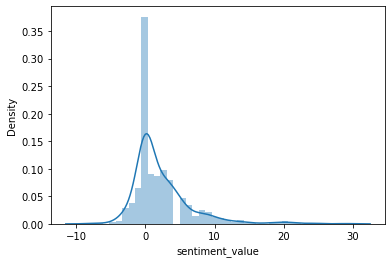

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sentence_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

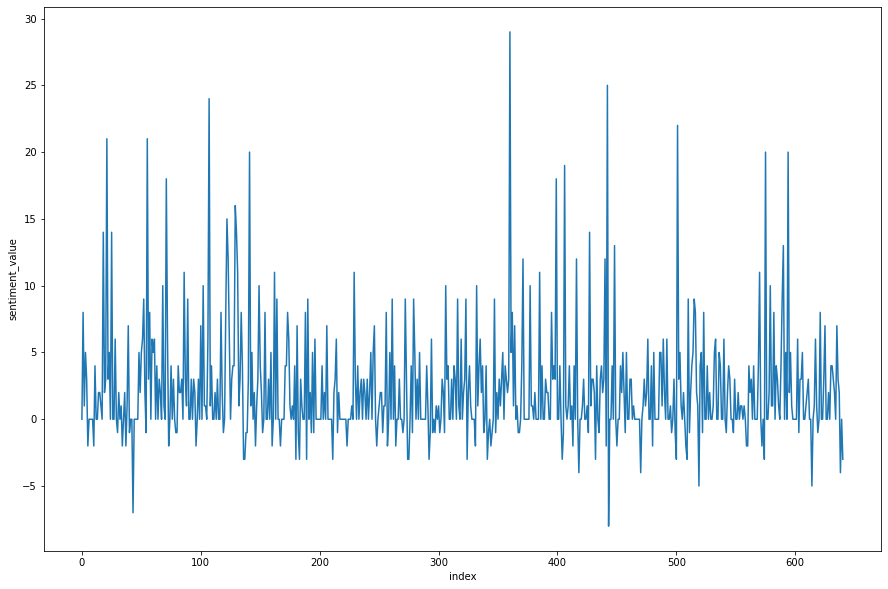

In [42]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sentence_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

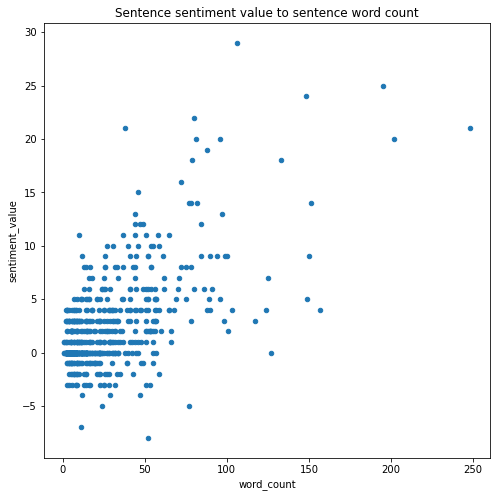

In [43]:
sentence_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# Word Clouds:

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

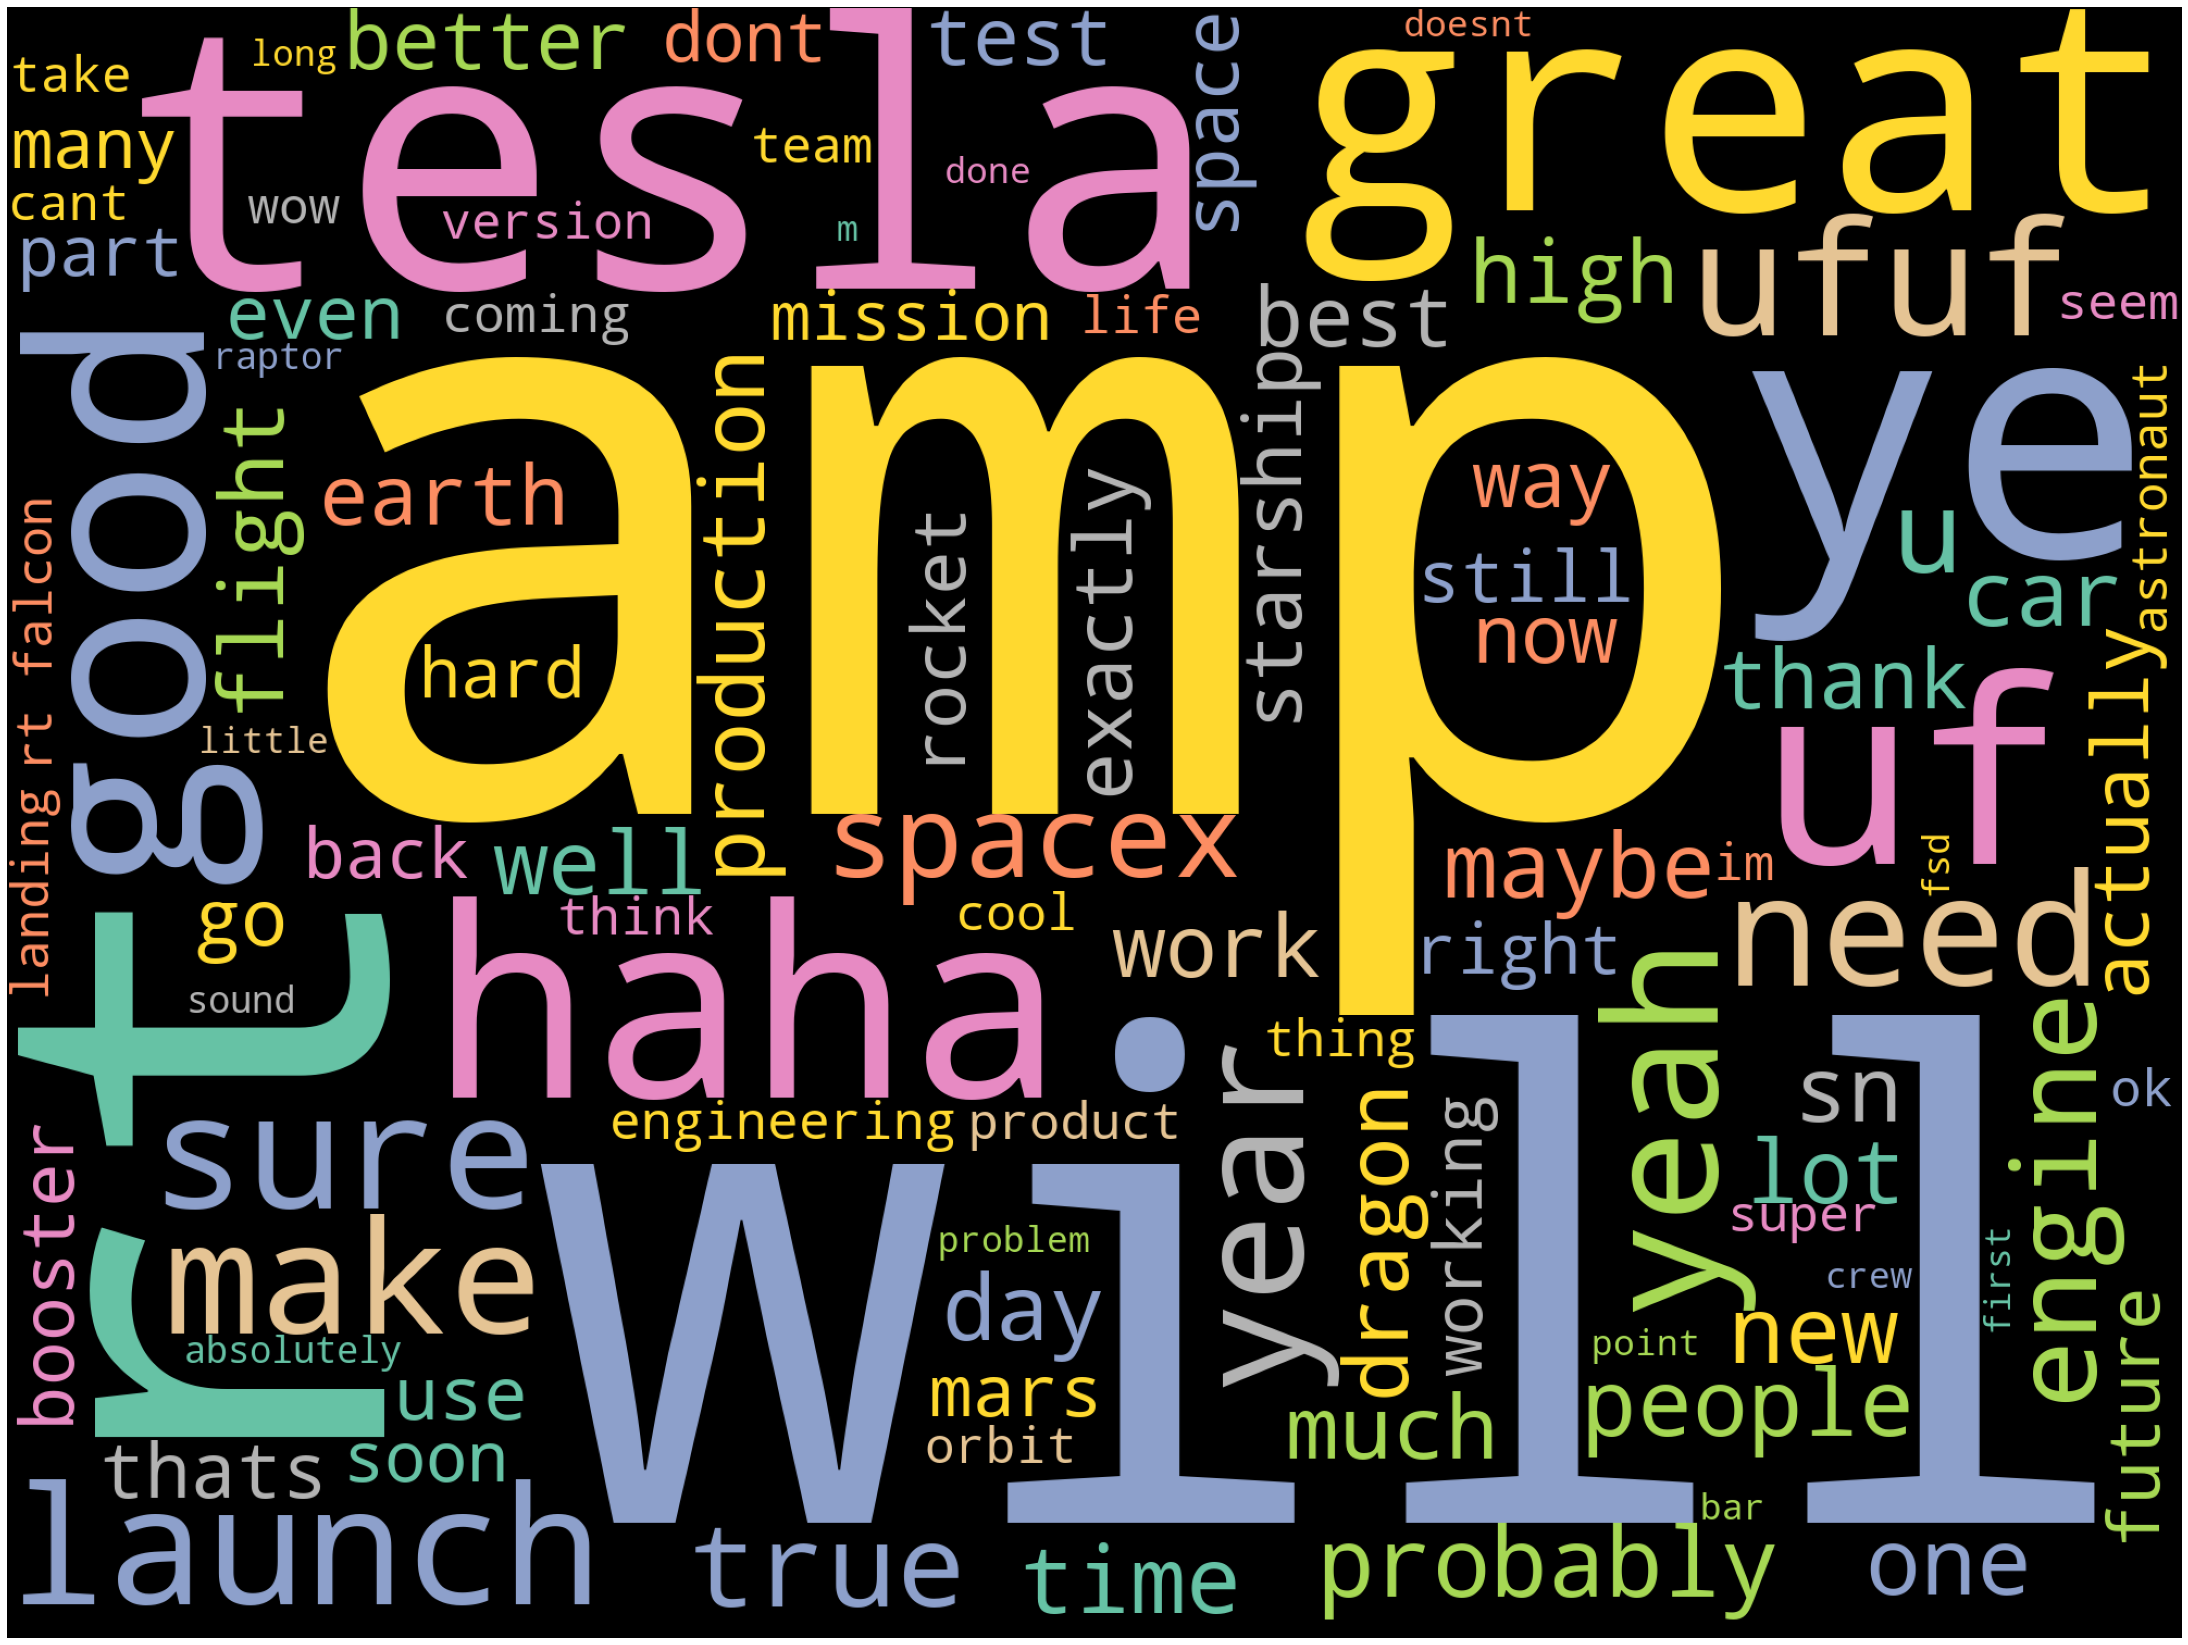

In [45]:
# Generate wordcloud using all the words :
stopwords = STOPWORDS
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      background_color='black',
                      max_words=100,
                      colormap='Set2',stopwords=stopwords).generate(emt_tot)
# Plot
plot_cloud(wordcloud)